In [4]:
import pyarrow as pa
table = pa.ipc.open_file('/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/train/25496f19ffd14bd088cb430bfc01a4d7.arrow')
data = table.read_all()
import pandas as pd
df = data.to_pandas()
# 查看数据基本信息
print(df.info())

# # 查看前几行数据
# print(df.head())

# # 查看列名
# print(df.columns.tolist())

# # 查看数据形状（行数和列数）
# print(f"数据形状: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   token                 40 non-null     object
 1   timestamp             40 non-null     int64 
 2   detections_state      40 non-null     object
 3   detections_velocity   40 non-null     object
 4   detections_token      40 non-null     object
 5   detections_type       40 non-null     object
 6   ego_states            40 non-null     object
 7   traffic_light_ids     40 non-null     object
 8   traffic_light_types   40 non-null     object
 9   scenario_tag          40 non-null     object
 10  route_lane_group_ids  40 non-null     object
 11  lidar                 40 non-null     object
 12  cam_f0                40 non-null     object
 13  cam_f0_extrinsic      40 non-null     object
 14  cam_b0                40 non-null     object
 15  cam_b0_extrinsic      40 non-null     obje

In [1]:
import sys
sys.path.append("/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/d123/tool/nuscenes-devkit/python-sdk")
sys.path.append("/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/d123")

In [2]:
import os
os.environ["D123_DEVKIT_ROOT"] = "/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/d123"
os.environ["D123_DATA_ROOT"] = "/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/data"
os.environ["D123_MAPS_ROOT"] = "/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/data/maps"
os.environ["D123_EXP_ROOT"] = "/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/exp"
os.environ["NUPLAN_DATA_ROOT"] = "/inspire/hdd/project/roboticsystem2/public/nuplan/dataset"
os.environ["NUPLAN_MAPS_ROOT"] = "/inspire/hdd/project/roboticsystem2/public/nuplan/dataset/maps"
os.environ["PYTHONPATH"] = "/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/d123:/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/d123/tool/nuscenes-devkit/python-sdk:" + os.environ.get("PYTHONPATH", "")
os.environ["NUSCENES_DATA_ROOT"] = "/inspire/hdd/project/roboticsystem2/public/nuscenes"
os.environ["NUSCENES_MAPS_ROOT"] = "/inspire/hdd/project/roboticsystem2/public/nuscenes"
# 注意：原始配置中没有CARLA_DATA_ROOT，保持了你原来的值
os.environ["CARLA_DATA_ROOT"] = "/nas/shared/opendrivelab/nuplan/dataset"

In [ ]:
# from nuscenes.map_expansion.map_api import NuScenesMap

# dataroot = "/cpfs01/shared/opendrivelab/datasets"
# map_name = "singapore-onenorth"
# nusc_map = NuScenesMap(dataroot=dataroot, map_name=map_name)

# def judge_layer(layer_name, records):
#     if not records:
#         return f"{layer_name}: 空"
#     keys = set(records[0].keys())
#     if "line_token" in keys or "line_tokens" in keys:
#         return f"{layer_name}: LINE (→ _process_line_layer)"
#     elif "polygon_token" in keys or "polygon_tokens" in keys:
#         return f"{layer_name}: POLYGON (→ _process_polygon_layer)"
#     else:
#         return f"{layer_name}: 未知字段 {keys}"

# # 只检查你关心的几个
# layers_to_check = ["stop_line", "road_divider", "lane_divider"]

# for layer in layers_to_check:
#     records = getattr(nusc_map, layer)
#     print(judge_layer(layer, records))


In [3]:
import sys
# 添加d123包的根目录到Python搜索路径
sys.path.append("/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/d123")

from nuscenes.map_expansion.map_api import NuScenesMap
from nuscenes.nuscenes import NuScenes
from d123.dataset.maps.map_datatypes import RoadLineType
from collections import Counter

dataroot = "/inspire/hdd/project/roboticsystem2/public/nuscenes"
map_name = "boston-seaport"

# 用 trainval 而不是 mini
nusc = NuScenes(version="v1.0-trainval", dataroot=dataroot, verbose=False)
nusc_map = NuScenesMap(dataroot=dataroot, map_name=map_name)

# 查看NuScenes中的线型
left_types = Counter()
right_types = Counter()

for lane in nusc_map.lane:
    for seg in lane.get("left_lane_divider_segments", []):
        t = seg.get("segment_type")
        if t is not None:
            left_types[t] += 1
    for seg in lane.get("right_lane_divider_segments", []):
        t = seg.get("segment_type")
        if t is not None:
            right_types[t] += 1

print("NuScenes左侧 lane_divider 线型统计：")
for k, v in left_types.items():
    print(f"  {k}: {v}")

print("\nNuScenes右侧 lane_divider 线型统计：")
for k, v in right_types.items():
    print(f"  {k}: {v}")

print("\n" + "="*50)
print("RoadLineType的所有枚举成员:")

# 正确获取枚举成员
if hasattr(RoadLineType, '__members__'):
    # 如果是标准枚举
    for name, value in RoadLineType.__members__.items():
        print(f"  {name}: {value}")
else:
    # 对于自定义枚举类，手动过滤
    valid_members = []
    for attr_name in dir(RoadLineType):
        if (not attr_name.startswith('_') and 
            not callable(getattr(RoadLineType, attr_name)) and
            attr_name not in ['denominator', 'imag', 'numerator', 'real']):
            attr_value = getattr(RoadLineType, attr_name)
            if isinstance(attr_value, int):  # 确保是整数值
                valid_members.append(attr_name)
                print(f"  {attr_name}: {attr_value}")

print("\n可用于映射的RoadLineType属性:")
print([name for name in RoadLineType.__members__.keys()] if hasattr(RoadLineType, '__members__') else valid_members)

NuScenes左侧 lane_divider 线型统计：
  DOUBLE_DASHED_WHITE: 818
  SINGLE_SOLID_WHITE: 376
  SINGLE_SOLID_YELLOW: 2

NuScenes右侧 lane_divider 线型统计：
  SINGLE_SOLID_WHITE: 1486
  DOUBLE_DASHED_WHITE: 966
  SINGLE_SOLID_YELLOW: 2

RoadLineType的所有枚举成员:
  UNKNOWN: 0
  BROKEN_SINGLE_WHITE: 1
  SOLID_SINGLE_WHITE: 2
  SOLID_DOUBLE_WHITE: 3
  BROKEN_SINGLE_YELLOW: 4
  BROKEN_DOUBLE_YELLOW: 5
  SOLID_SINGLE_YELLOW: 6
  SOLID_DOUBLE_YELLOW: 7
  PASSING_DOUBLE_YELLOW: 8

可用于映射的RoadLineType属性:
['UNKNOWN', 'BROKEN_SINGLE_WHITE', 'SOLID_SINGLE_WHITE', 'SOLID_DOUBLE_WHITE', 'BROKEN_SINGLE_YELLOW', 'BROKEN_DOUBLE_YELLOW', 'SOLID_SINGLE_YELLOW', 'SOLID_DOUBLE_YELLOW', 'PASSING_DOUBLE_YELLOW']


In [7]:
for record in nusc_map.road_divider:
    print(record.keys())
    break

dict_keys(['token', 'line_token', 'road_segment_token', 'node_tokens'])


In [3]:
import sys
sys.path.append("/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/d123")

from nuscenes.map_expansion.map_api import NuScenesMap
from d123.dataset.maps.map_datatypes import RoadLineType
from collections import Counter

dataroot = "/inspire/hdd/project/roboticsystem2/public/nuscenes"
map_name = "boston-seaport"

nusc_map = NuScenesMap(dataroot=dataroot, map_name=map_name)

print("=== 详细调试线型映射过程 ===")

# 1. 检查 lane_divider 和 road_divider 记录
print("\n1. 检查 divider 记录:")
print(f"lane_divider 记录数: {len(nusc_map.lane_divider)}")
print(f"road_divider 记录数: {len(nusc_map.road_divider)}")

# 2. 检查 lane_divider 记录的结构
if nusc_map.lane_divider:
    sample_lane_divider = nusc_map.lane_divider[0]
    print(f"\n2. lane_divider 记录结构: {sample_lane_divider.keys()}")
    
# 3. 检查 road_divider 记录的结构  
if nusc_map.road_divider:
    sample_road_divider = nusc_map.road_divider[0]
    print(f"road_divider 记录结构: {sample_road_divider.keys()}")

# 4. 详细检查车道记录中的线型信息
print("\n3. 详细检查车道记录中的线型映射:")
line_token_to_type = {}

for i, lane_record in enumerate(nusc_map.lane[:5]):  # 只检查前5条
    print(f"\n车道 {i} (token: {lane_record['token']}):")
    
    # 左侧分隔线
    left_segments = lane_record.get("left_lane_divider_segments", [])
    print(f"  左侧分隔线段数: {len(left_segments)}")
    for seg in left_segments[:3]:  # 只显示前3段
        line_token = seg.get("line_token")
        seg_type = seg.get("segment_type")
        print(f"    线段: token={line_token}, type={seg_type}")
        if line_token and seg_type:
            line_token_to_type[line_token] = seg_type
    
    # 右侧分隔线
    right_segments = lane_record.get("right_lane_divider_segments", [])
    print(f"  右侧分隔线段数: {len(right_segments)}")
    for seg in right_segments[:3]:  # 只显示前3段
        line_token = seg.get("line_token")
        seg_type = seg.get("segment_type")
        print(f"    线段: token={line_token}, type={seg_type}")
        if line_token and seg_type:
            line_token_to_type[line_token] = seg_type

print(f"\n4. 收集到的线型映射总数: {len(line_token_to_type)}")

# 5. 检查 divider 记录中的线token是否在映射中
print(f"\n5. 检查divider记录的线token映射:")
found_count = 0
not_found_count = 0

for divider_type, dividers in [("lane_divider", nusc_map.lane_divider), ("road_divider", nusc_map.road_divider)]:
    for i, divider in enumerate(dividers[:10]):  # 只检查前10条
        line_token = divider.get("line_token")
        mapped_type = line_token_to_type.get(line_token, "NOT_FOUND")
        print(f"  {divider_type}[{i}]: line_token={line_token} -> type={mapped_type}")
        
        if mapped_type != "NOT_FOUND":
            found_count += 1
        else:
            not_found_count += 1

print(f"\n映射统计: 找到 {found_count}, 未找到 {not_found_count}")

# 6. 测试映射函数
print(f"\n6. 测试映射函数:")
nuscenes_to_road_line_type = {
    "SINGLE_SOLID_WHITE": RoadLineType.SOLID_SINGLE_WHITE,
    "DOUBLE_DASHED_WHITE": RoadLineType.BROKEN_SINGLE_WHITE,
    "SINGLE_SOLID_YELLOW": RoadLineType.SOLID_SINGLE_YELLOW,
    "UNKNOWN": RoadLineType.UNKNOWN,
}

test_types = ["SINGLE_SOLID_WHITE", "DOUBLE_DASHED_WHITE", "SINGLE_SOLID_YELLOW", "NOT_EXIST"]
for test_type in test_types:
    mapped = nuscenes_to_road_line_type.get(test_type, RoadLineType.UNKNOWN)
    print(f"  {test_type} -> {mapped}")

# 7. 完整的线型统计
print(f"\n7. 完整的线型统计:")
all_line_types = Counter()

for lane_record in nusc_map.lane:
    for seg in lane_record.get("left_lane_divider_segments", []):
        t = seg.get("segment_type")
        if t:
            all_line_types[t] += 1
    for seg in lane_record.get("right_lane_divider_segments", []):
        t = seg.get("segment_type")
        if t:
            all_line_types[t] += 1

print("所有线型统计:")
for line_type, count in all_line_types.most_common():
    print(f"  {line_type}: {count}")

=== 详细调试线型映射过程 ===

1. 检查 divider 记录:
lane_divider 记录数: 671
road_divider 记录数: 377

2. lane_divider 记录结构: dict_keys(['token', 'line_token', 'lane_divider_segments', 'node_tokens'])
road_divider 记录结构: dict_keys(['token', 'line_token', 'road_segment_token', 'node_tokens'])

3. 详细检查车道记录中的线型映射:

车道 0 (token: 0073298b-b2f4-4f89-97cd-4241a1599831):
  左侧分隔线段数: 0
  右侧分隔线段数: 0

车道 1 (token: 01a3b994-8aa9-450d-865a-ceb0666c90fa):
  左侧分隔线段数: 0
  右侧分隔线段数: 0

车道 2 (token: 01d984fc-b027-4597-81b8-2cccfab3aae4):
  左侧分隔线段数: 0
  右侧分隔线段数: 0

车道 3 (token: 01f896fa-fd6a-400e-87a3-6b1afda98c92):
  左侧分隔线段数: 0
  右侧分隔线段数: 0

车道 4 (token: 0240de26-ce8b-48ed-a077-466dc28b2013):
  左侧分隔线段数: 4
    线段: token=None, type=DOUBLE_DASHED_WHITE
    线段: token=None, type=DOUBLE_DASHED_WHITE
    线段: token=None, type=DOUBLE_DASHED_WHITE
  右侧分隔线段数: 0

4. 收集到的线型映射总数: 0

5. 检查divider记录的线token映射:
  lane_divider[0]: line_token=b1103c66-1d18-40d9-95ef-dfd0b126328a -> type=NOT_FOUND
  lane_divider[1]: line_token=b60be7bc-58ac-43e1-b

In [15]:
import pandas as pd

# 1. 查看前3行的`detections_type`（检测目标类别）
print("检测目标类别示例：")
print(df['detections_type'].head(3))

# 2. 查看第0行的`ego_states`（自车状态）
print("\n自车状态示例（第0行）：")
print(df['ego_states'].iloc[0])

# 3. 查看第1行的`lidar`路径（激光雷达数据路径）
print("\nLiDAR数据路径示例（第1行）：")
print(df['lidar'].iloc[1])

检测目标类别示例：
0    [4, 4, 4, 4, 0, 2, 0, 0, 4, 2, 4, 4, 0, 4, 3, ...
1    [4, 4, 4, 4, 0, 2, 0, 0, 4, 2, 4, 4, 0, 4, 0, ...
2    [4, 4, 4, 4, 0, 3, 2, 4, 0, 0, 4, 2, 4, 4, 0, ...
Name: detections_type, dtype: object

自车状态示例（第0行）：
[ 3.57393099e+02  1.07279983e+03  0.00000000e+00 -1.14889513e-02
 -2.70739808e-02  1.18136776e+00  3.94810994e+00  0.00000000e+00
  0.00000000e+00  5.71969699e-01 -2.48502076e-01  9.79183723e+00
 -8.82565044e-03  3.84283671e-03 -4.54844121e-04]

LiDAR数据路径示例（第1行）：
/cpfs01/shared/opendrivelab/datasets/nuscenes/samples/LIDAR_TOP/n015-2018-07-18-11-18-34+0800__LIDAR_TOP__1531883986448607.pcd.bin


In [ ]:
# from nuscenes.map_expansion.map_api import NuScenesMap

# # 加载一个地图实例
# nusc_map = NuScenesMap(dataroot='/cpfs01/shared/opendrivelab/datasets/nuscenes', map_name='boston-seaport')

# 打印所有可用属性
print("NuScenesMap 可用属性:", dir(nusc_map))

# 查看 road_block 内容
print("road_block 示例:", nusc_map.road_block[0] if nusc_map.road_block else "空")

# 查看 road_segment 内容
print("road_segment 示例:", nusc_map.road_segment[0] if nusc_map.road_segment else "空")

ModuleNotFoundError: No module named 'nuscenes'

In [12]:
from nuscenes.map_expansion.map_api import NuScenesMap

# 数据集路径（替换为你的实际路径）
DATAROOT = '/cpfs01/shared/opendrivelab/datasets/nuscenes'
# 要检查的地图名称（使用官方支持的名称）
MAP_NAMES = ['boston-seaport', 'singapore-hollandvillage', 
             'singapore-onenorth', 'singapore-queenstown']
# 你配置的 layers 字典（与代码中一致）
LAYERS = {
    "lane": ("lane", "polygon"),
    "road_segment": ("road_segment", "polygon"),
    "intersection": ("road_block", "polygon"),
    "ped_crossing": ("ped_crossing", "polygon"),
    "walkway": ("walkway", "polygon"),
    "carpark": ("carpark_area", "polygon"),
    "road": ("drivable_area", "polygon"),
    "road_divider": ("road_divider", "line"),
    "lane_divider": ("lane_divider", "line"),
}

def check_missing_polygon_token():
    for map_name in MAP_NAMES:
        print(f"\n===== 检查地图: {map_name} =====")
        # 加载地图
        nusc_map = NuScenesMap(dataroot=DATAROOT, map_name=map_name)
        
        for layer_key, (table_name, layer_type) in LAYERS.items():
            # 只检查多边形图层（line图层不需要polygon_token）
            if layer_type != "polygon":
                continue
            
            try:
                # 获取该图层的所有记录
                records = getattr(nusc_map, table_name)
                print(f"\n处理图层: {table_name}（共 {len(records)} 条记录）")
                
                # 检查每条记录是否包含 polygon_token
                missing_count = 0
                for i, record in enumerate(records):
                    if "polygon_token" not in record:
                        missing_count += 1
                        # 打印前3条缺失的记录示例
                        if missing_count <= 3:
                            print(f"  缺失 polygon_token 的记录示例（{i}）: {record.keys()}")
                
                if missing_count == 0:
                    print(f"  ✅ 所有记录均包含 polygon_token")
                else:
                    print(f"  ❌ 共 {missing_count} 条记录缺失 polygon_token（占比 {missing_count/len(records):.2%}）")
            
            except AttributeError:
                print(f"  ❌ 图层 {table_name} 不存在于地图 {map_name}")
            except Exception as e:
                print(f"  处理出错: {str(e)}")

if __name__ == "__main__":
    check_missing_polygon_token()

ModuleNotFoundError: No module named 'nuscenes'

In [2]:
from nuscenes.map_expansion.map_api import NuScenesMap
import os

# 数据集路径（替换为你的实际路径）
DATAROOT = '/cpfs01/shared/opendrivelab/datasets/nuscenes'
# 选择一个地图名称（使用官方名称）
MAP_NAME = 'boston-seaport'  # 可替换为其他地图，如 'singapore-onenorth'

def print_lane_record_fields():
    # 加载地图
    nusc_map = NuScenesMap(dataroot=DATAROOT, map_name=MAP_NAME)
    
    # 检查是否存在 'lane' 图层
    if not hasattr(nusc_map, 'lane'):
        print(f"错误：地图 {MAP_NAME} 中不存在 'lane' 图层")
        return
    
    # 获取车道记录列表
    lane_records = nusc_map.lane
    if not lane_records:
        print(f"警告：地图 {MAP_NAME} 的 'lane' 图层为空")
        return
    
    # 打印第一条车道记录的字段
    first_lane = lane_records[0]
    print(f"===== 地图 {MAP_NAME} 的车道记录（lane）字段 =====")
    print(f"字段列表：{list(first_lane.keys())}")
    print("\n字段详情（第一条记录）：")
    for key, value in first_lane.items():
        # 简化长列表的显示（如坐标点）
        if isinstance(value, (list, tuple)) and len(value) > 5:
            print(f"  {key}: {type(value)}（长度：{len(value)}）示例：{value[:2]}...")
        else:
            print(f"  {key}: {value}")

if __name__ == "__main__":
    print_lane_record_fields()

ModuleNotFoundError: No module named 'nuscenes'

In [15]:
from nuscenes.map_expansion.map_api import NuScenesMap

# 数据集路径（替换为你的实际路径）
DATAROOT = '/cpfs01/shared/opendrivelab/datasets/nuscenes'
# 选择一个地图名称（使用官方名称）
MAP_NAME = 'boston-seaport'  # 可替换为其他地图，如 'singapore-onenorth'

def print_road_segment_fields():
    # 加载地图
    nusc_map = NuScenesMap(dataroot=DATAROOT, map_name=MAP_NAME)
    
    # 检查是否存在 'road_segment' 图层
    if not hasattr(nusc_map, 'road_segment'):
        print(f"错误：地图 {MAP_NAME} 中不存在 'road_segment' 图层")
        return
    
    # 获取道路片段记录列表
    road_segments = nusc_map.road_segment
    if not road_segments:
        print(f"警告：地图 {MAP_NAME} 的 'road_segment' 图层为空")
        return
    
    # 打印第一条道路片段记录的字段
    first_segment = road_segments[0]
    print(f"===== 地图 {MAP_NAME} 的道路片段（road_segment）字段 =====")
    print(f"字段列表：{list(first_segment.keys())}")
    print("\n字段详情（第一条记录）：")
    for key, value in first_segment.items():
        # 简化长列表的显示
        if isinstance(value, (list, tuple)) and len(value) > 5:
            print(f"  {key}: {type(value)}（长度：{len(value)}）示例：{value[:2]}...")
        else:
            print(f"  {key}: {value}")

if __name__ == "__main__":
    print_road_segment_fields()

===== 地图 boston-seaport 的道路片段（road_segment）字段 =====
字段列表：['token', 'polygon_token', 'is_intersection', 'drivable_area_token', 'exterior_node_tokens', 'holes']

字段详情（第一条记录）：
  token: 00683936-1a08-4861-9ce5-bb4fc753dada
  polygon_token: bea6cf31-59e5-48d9-8ca1-28312b5313d1
  is_intersection: False
  drivable_area_token: 
  exterior_node_tokens: ['1db10edf-09c7-49a8-99ad-96bbaae9364f', '298020ff-5a71-41e2-8ae3-633edf52c8a4', '5679d6fb-1cb0-4e2d-8410-ed15a49e889d', 'cce51224-23bf-4d5b-b236-9ac0c51c02e3', 'c5d97cde-4255-4830-9e94-5b1f648231cc']
  holes: []


In [19]:
from nuscenes.map_expansion.map_api import NuScenesMap

nusc_map = NuScenesMap(
    dataroot='/cpfs01/shared/opendrivelab/datasets/nuscenes',
    map_name='boston-seaport'
)

# nusc_map.lane 是一个列表，每个元素是 lane dict
lane_token = "006f28b3-2b4c-4221-8957-d3b7f5739d3d"

# 查找该 token
lane_obj = next((lane for lane in nusc_map.lane if lane['token'] == lane_token), None)

if lane_obj is not None:
    print("Lane found:", lane_obj)
else:
    print(f"Lane token {lane_token} not found in the map.")


Lane token 006f28b3-2b4c-4221-8957-d3b7f5739d3d not found in the map.


In [1]:
from d123.common.datatypes.sensor.lidar_index import LIDAR_INDEX_REGISTRY

# 查询所有可用的LiDAR索引类
print("可用的LiDAR索引类:")
for class_name in LIDAR_INDEX_REGISTRY:
    print(f"- {class_name}")

# 获取第一个类作为示例
if LIDAR_INDEX_REGISTRY:
    first_class_name = list(LIDAR_INDEX_REGISTRY.keys())[0]
    first_class = LIDAR_INDEX_REGISTRY[first_class_name]
    print(f"\n第一个类: {first_class_name}")
    print(f"类对象: {first_class}")
else:
    print("没有可用的LiDAR索引类")

可用的LiDAR索引类:
- DefaultLidarIndex
- NuplanLidarIndex
- CarlaLidarIndex
- WopdLidarIndex

第一个类: DefaultLidarIndex
类对象: <enum 'DefaultLidarIndex'>


In [ ]:
#地图
import fiona
import geopandas as gpd
from pathlib import Path

def check_gpkg_file(file_path):
    """检查GPKG文件完整性"""
    file_path = Path(file_path)
    
    # 1. 检查文件是否存在
    if not file_path.exists():
        print("❌ 文件不存在")
        return False
    
    # 2. 检查文件大小
    file_size = file_path.stat().st_size
    print(f"📁 文件大小: {file_size / (1024*1024):.2f} MB")
    
    if file_size == 0:
        print("❌ 文件为空")
        return False
    
    try:
        # 3. 使用fiona检查文件结构
        print("🔍 检查文件结构...")
        with fiona.open(file_path, 'r') as src:
            print(f"✅ 文件格式: {src.driver}")
            print(f"📊 图层数量: {len(src.meta.get('layers', []))}")
            print(f"📋 图层列表: {[layer for layer in src.meta.get('layers', [])]}")
            
            # 检查每个图层
            for layer_name in src.meta.get('layers', []):
                with fiona.open(file_path, 'r', layer=layer_name) as layer:
                    print(f"  图层 '{layer_name}': {len(layer)} 个要素")
    
    except Exception as e:
        print(f"❌ 文件结构检查失败: {e}")
        return False
    
    try:
        # 4. 使用geopandas尝试读取数据
        print("🔍 尝试读取数据...")
        gdf = gpd.read_file(file_path)
        print(f"✅ 成功读取 {len(gdf)} 个地理要素")
        print(f"📐 坐标系: {gdf.crs}")
        print(f"🏷️  字段: {list(gdf.columns)}")
        
        # 检查是否有几何数据
        if not gdf.geometry.notnull().any():
            print("⚠️  警告: 没有有效的几何数据")
        
        return True
        
    except Exception as e:
        print(f"❌ 数据读取失败: {e}")
        return False

# 使用示例
file_path = "/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/maps/nuscenes_singapore-queenstown.gpkg"
if check_gpkg_file(file_path):
    print("\n🎉 GPKG文件完整且有效")
else:
    print("\n❌ GPKG文件可能损坏或不完整")
    
# 使用示例
file_path = "/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/maps/nuplan_us-nv-las-vegas-strip.gpkg"
if check_gpkg_file(file_path):
    print("\n🎉 GPKG文件完整且有效")
else:
    print("\n❌ GPKG文件可能损坏或不完整")

📁 文件大小: 116.39 MB
🔍 检查文件结构...
✅ 文件格式: GPKG
📊 图层数量: 0
📋 图层列表: []
🔍 尝试读取数据...
✅ 成功读取 910 个地理要素
📐 坐标系: None
🏷️  字段: ['id', 'lane_group_id', 'speed_limit_mps', 'predecessor_ids', 'successor_ids', 'left_boundary', 'right_boundary', 'baseline_path', 'geometry']

🎉 GPKG文件完整且有效
📁 文件大小: 71.80 MB
🔍 检查文件结构...
✅ 文件格式: GPKG
📊 图层数量: 0
📋 图层列表: []
🔍 尝试读取数据...


/cpfs01/shared/opendrivelab/sii/jingchanghui/miniconda3/envs/d123/lib/python3.12/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'nuscenes_singapore-queenstown.gpkg': 'lane' (default), 'lane_group', 'intersection', 'crosswalk', 'walkway', 'carpark', 'generic_drivable'. Specify layer parameter to avoid this warning.
  result = read_func(
/cpfs01/shared/opendrivelab/sii/jingchanghui/miniconda3/envs/d123/lib/python3.12/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'nuplan_us-nv-las-vegas-strip.gpkg': 'lane' (default), 'lane_group', 'intersection', 'crosswalk', 'walkway', 'carpark', 'generic_drivable'. Specify layer parameter to avoid this warning.
  result = read_func(


✅ 成功读取 4583 个地理要素
📐 坐标系: None
🏷️  字段: ['id', 'lane_group_id', 'speed_limit_mps', 'predecessor_ids', 'successor_ids', 'left_boundary', 'right_boundary', 'baseline_path', 'geometry']

🎉 GPKG文件完整且有效


开始地图文件分析与可视化...
📌 图片将保存至: /cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/d123/notebooks/viz/viz_plt

🎨 多文件可视化: 5个地图文件


✅ 已可视化: nuplan_las_vegas
✅ 已可视化: nuscenes_boston
✅ 已可视化: nuscenes_hollandvillage
✅ 已可视化: nuscenes_onenorth
✅ 已可视化: nuscenes_queenstown
💾 多文件对比图已保存至: /cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/d123/notebooks/viz/viz_plt/multiple_maps_comparison.jpeg


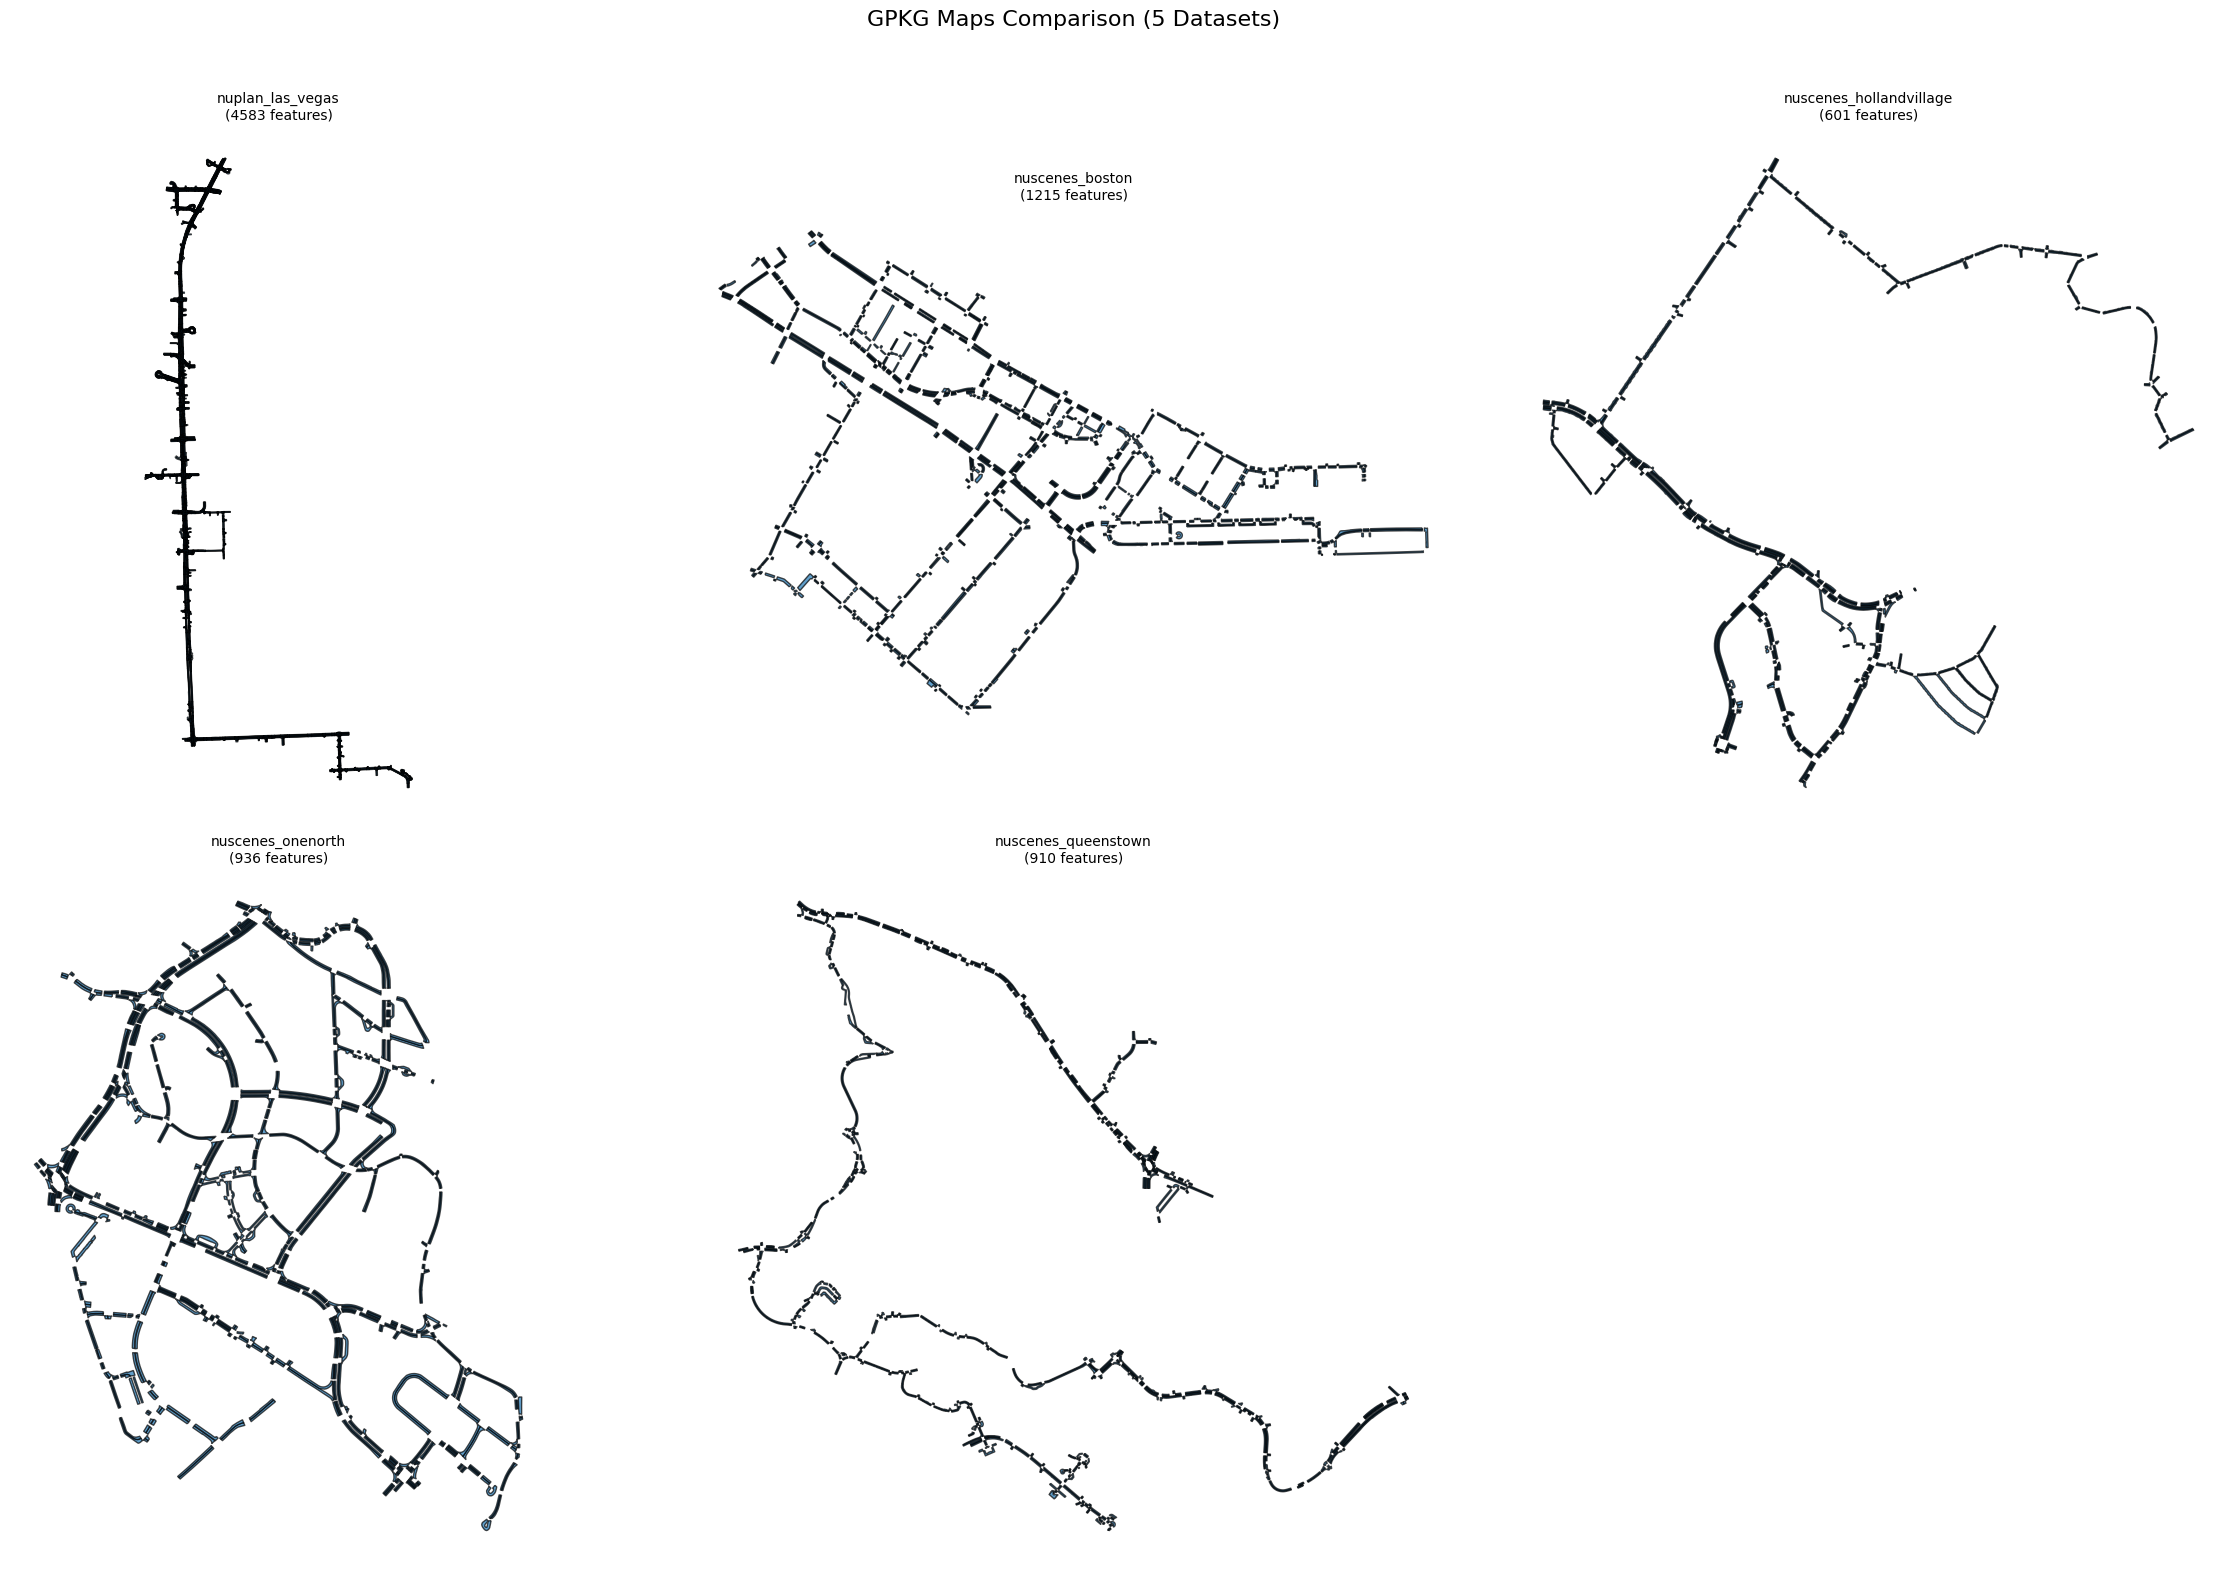


🎨 图层可视化: nuplan_las_vegas
✅ 图层 'lane': 4583 个要素
✅ 图层 'lane_group': 1883 个要素
✅ 图层 'intersection': 522 个要素
✅ 图层 'crosswalk': 233 个要素
✅ 图层 'walkway': 276 个要素
✅ 图层 'carpark': 71 个要素
✅ 图层 'generic_drivable': 128 个要素
💾 图层可视化图已保存至: /cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/d123/notebooks/viz/viz_plt/nuplan_las_vegas_layers.jpeg


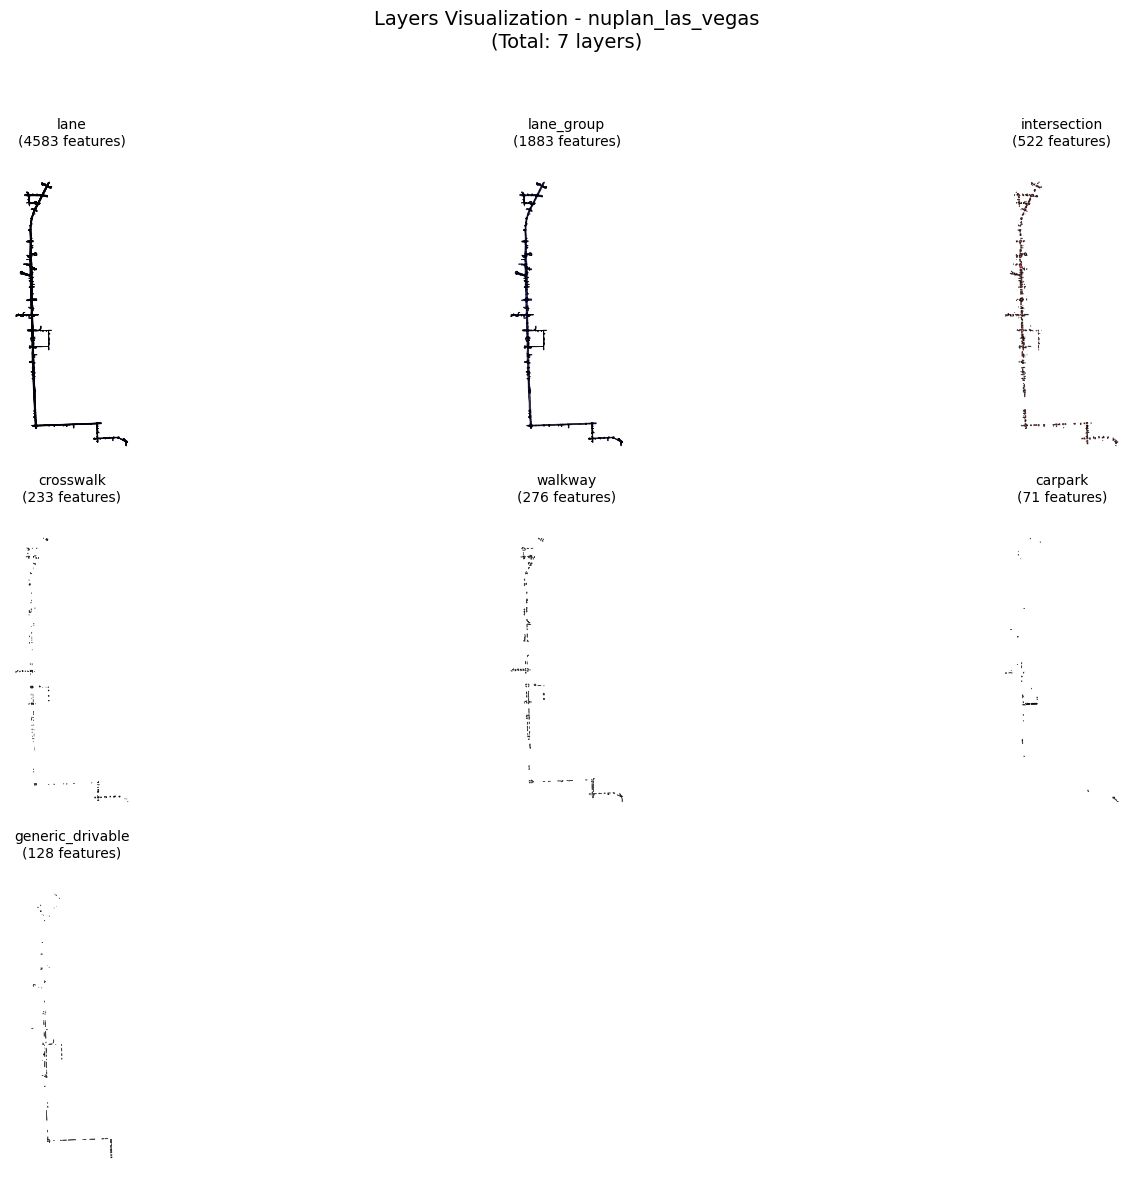


🎨 图层可视化: nuscenes_boston
✅ 图层 'lane': 1215 个要素
✅ 图层 'lane_group': 928 个要素
✅ 图层 'intersection': 969 个要素
✅ 图层 'crosswalk': 340 个要素
✅ 图层 'walkway': 301 个要素
✅ 图层 'carpark': 275 个要素
✅ 图层 'generic_drivable': 2213 个要素
✅ 图层 'stop_line': 775 个要素
✅ 图层 'road_line': 1048 个要素
💾 图层可视化图已保存至: /cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/d123/notebooks/viz/viz_plt/nuscenes_boston_layers.jpeg


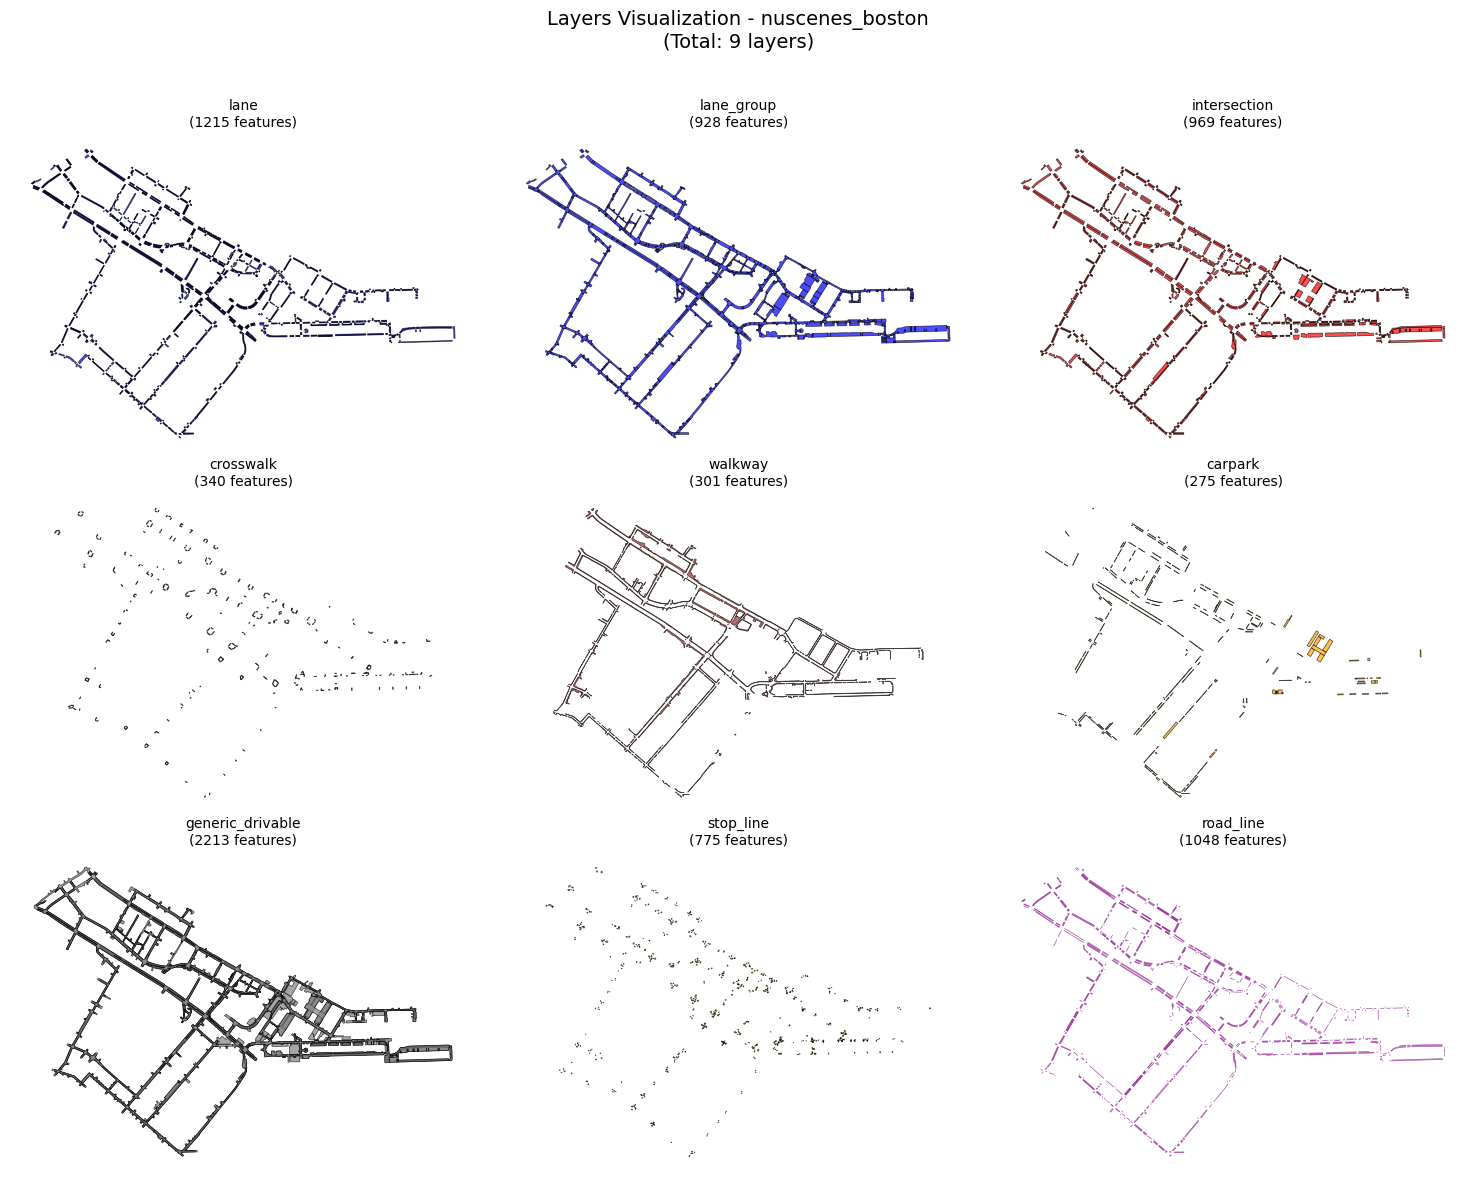


🎨 图层可视化: nuscenes_hollandvillage
✅ 图层 'lane': 601 个要素
✅ 图层 'lane_group': 167 个要素
✅ 图层 'intersection': 387 个要素
✅ 图层 'crosswalk': 28 个要素
✅ 图层 'walkway': 498 个要素
✅ 图层 'carpark': 0 个要素
✅ 图层 'generic_drivable': 1194 个要素
✅ 图层 'stop_line': 300 个要素
✅ 图层 'road_line': 327 个要素
💾 图层可视化图已保存至: /cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/d123/notebooks/viz/viz_plt/nuscenes_hollandvillage_layers.jpeg


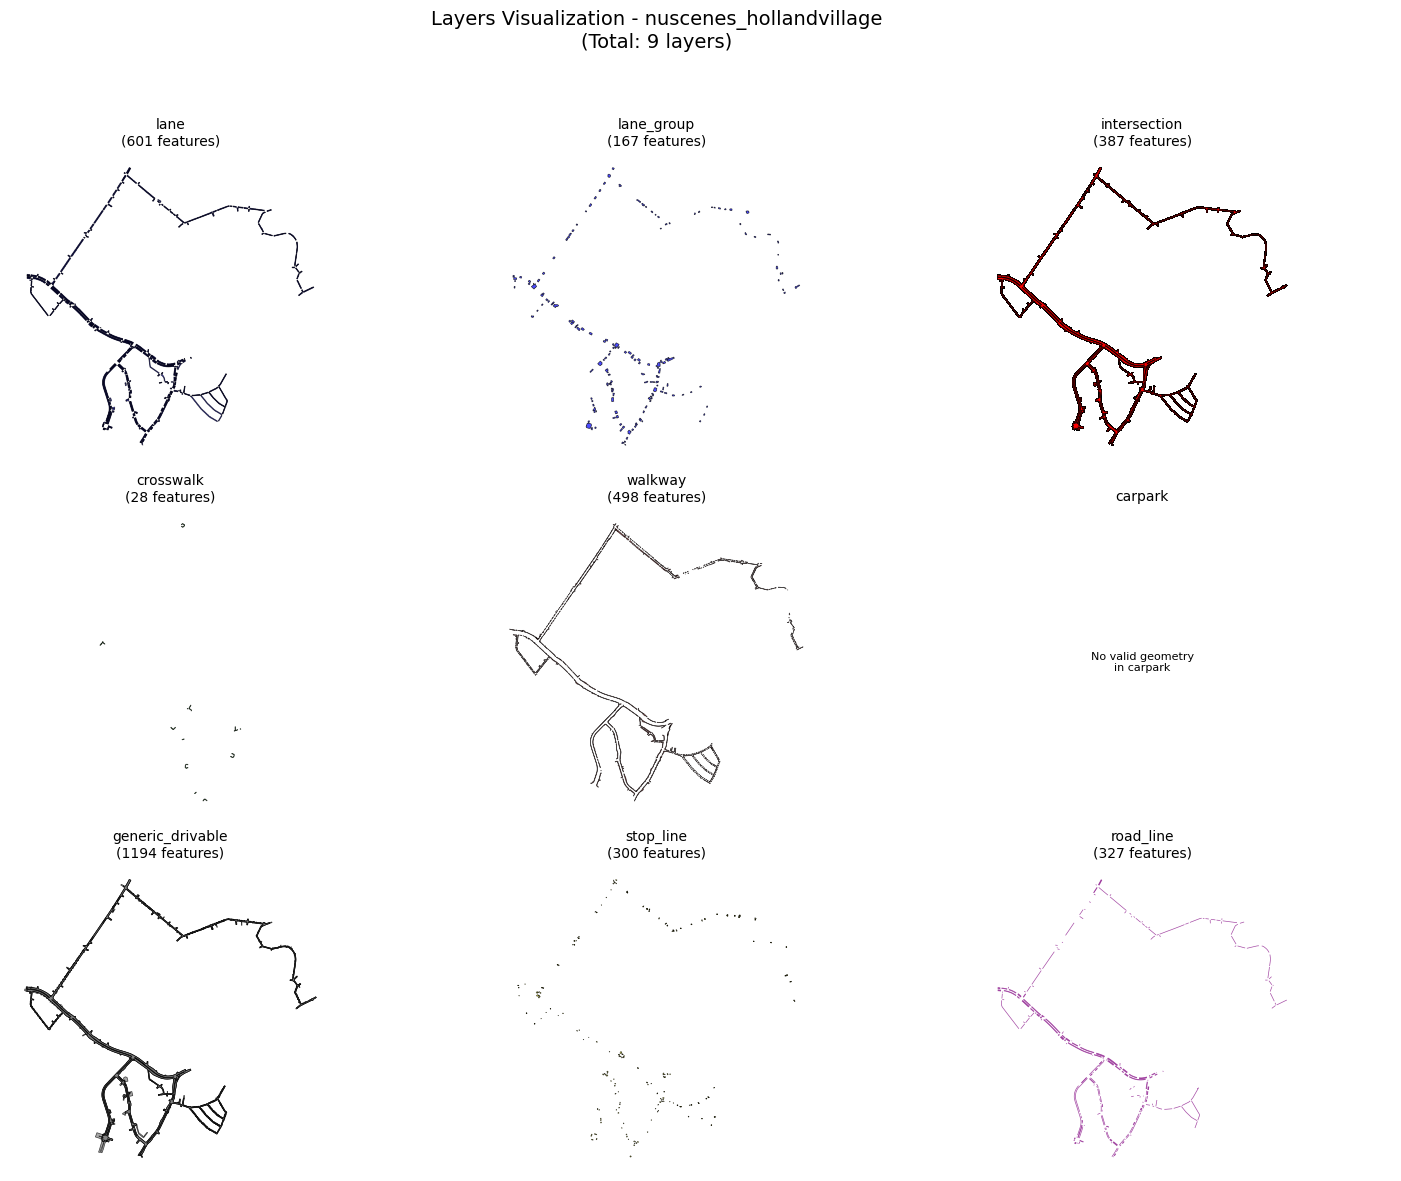


🎨 图层可视化: nuscenes_onenorth
✅ 图层 'lane': 936 个要素
✅ 图层 'lane_group': 783 个要素
✅ 图层 'intersection': 645 个要素
✅ 图层 'crosswalk': 120 个要素
✅ 图层 'walkway': 838 个要素
✅ 图层 'carpark': 39 个要素
✅ 图层 'generic_drivable': 1726 个要素
✅ 图层 'stop_line': 451 个要素
✅ 图层 'road_line': 509 个要素
💾 图层可视化图已保存至: /cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/d123/notebooks/viz/viz_plt/nuscenes_onenorth_layers.jpeg


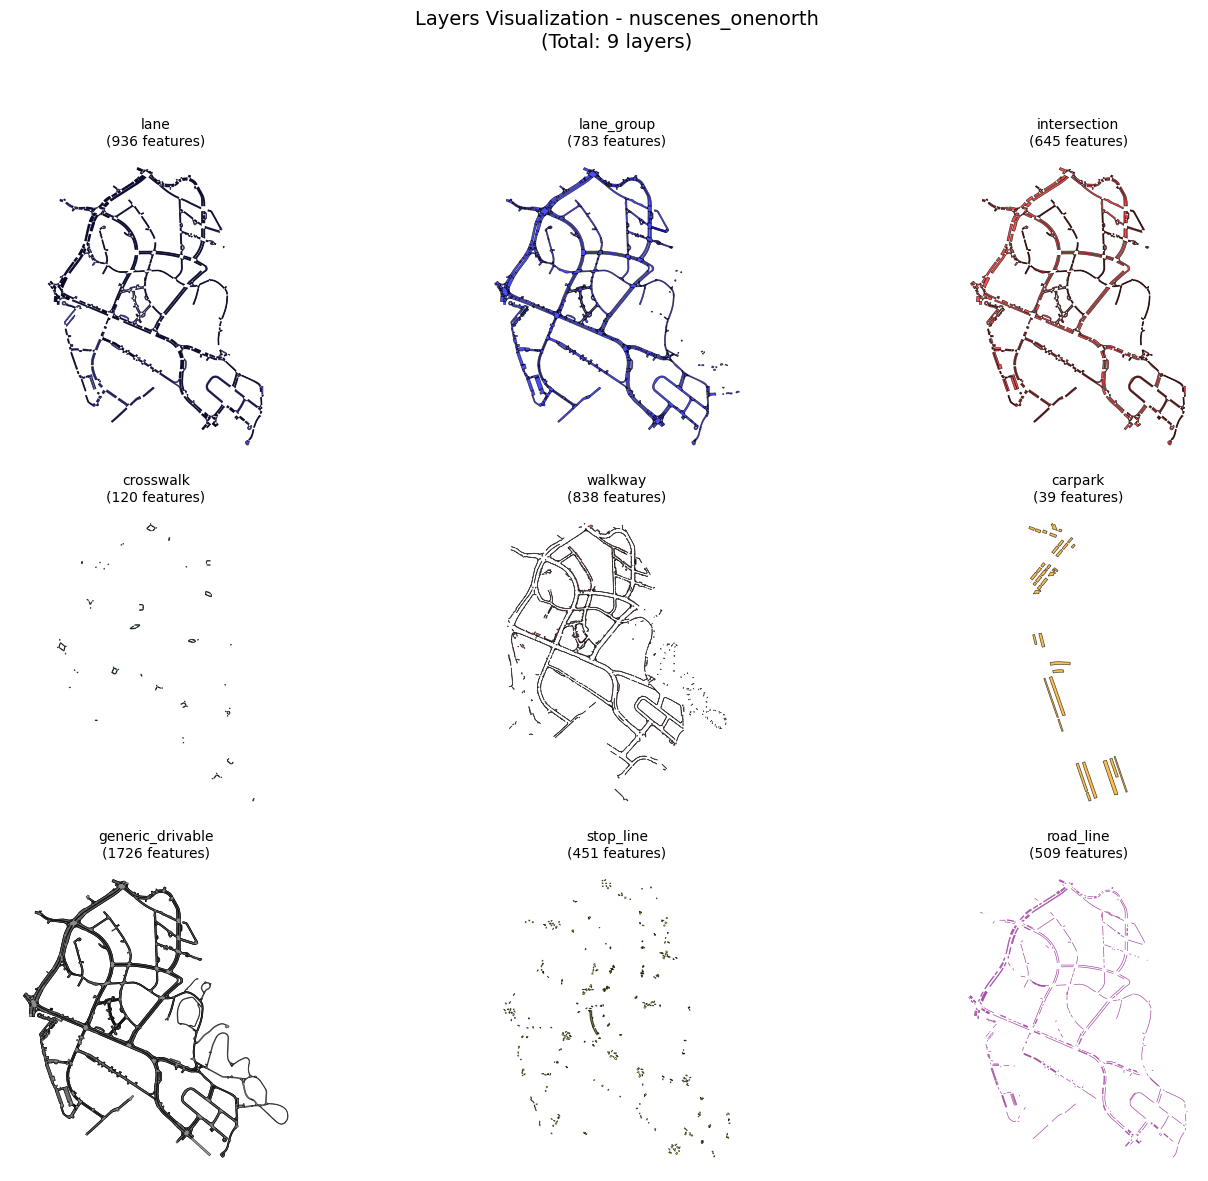


🎨 图层可视化: nuscenes_queenstown
✅ 图层 'lane': 910 个要素
✅ 图层 'lane_group': 260 个要素
✅ 图层 'intersection': 676 个要素
✅ 图层 'crosswalk': 75 个要素
✅ 图层 'walkway': 457 个要素
✅ 图层 'carpark': 40 个要素
✅ 图层 'generic_drivable': 1389 个要素
✅ 图层 'stop_line': 437 个要素
✅ 图层 'road_line': 429 个要素
💾 图层可视化图已保存至: /cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/d123/notebooks/viz/viz_plt/nuscenes_queenstown_layers.jpeg


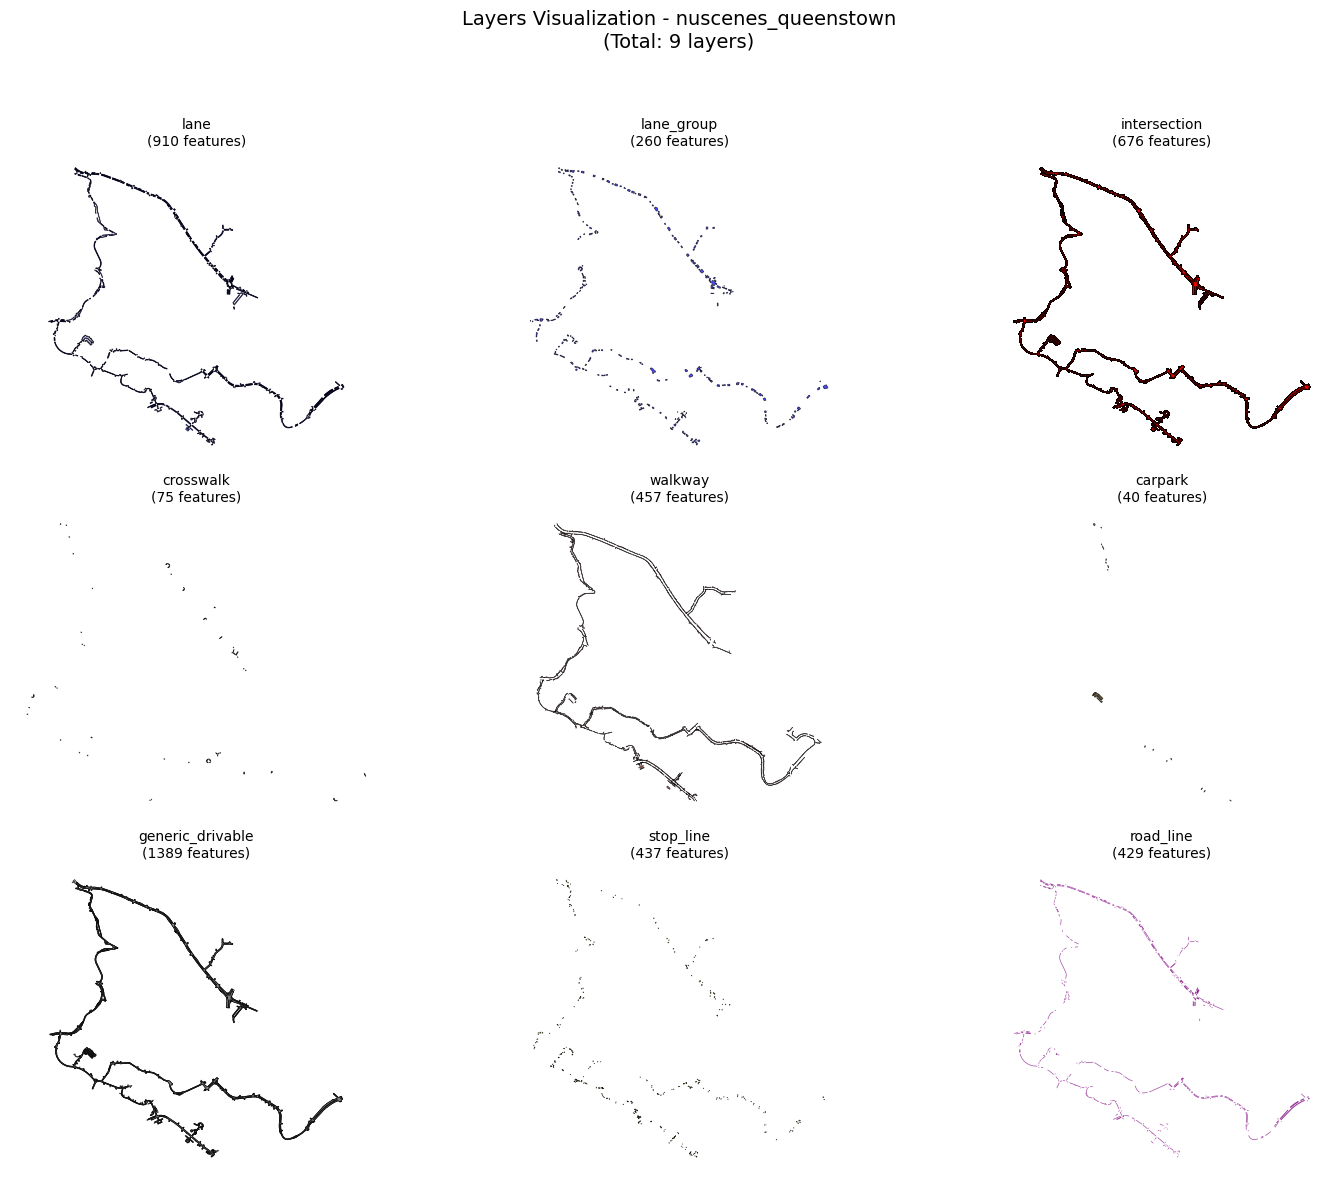


🔍 数据质量检查: nuplan_las_vegas

📊 图层 'lane':
  总要素数: 4583
  有效几何数: 4583
  空几何数: 0
  几何类型分布:
    Polygon: 4583
  字段 'id' 空值数: 0/4583
  字段 'geometry' 空值数: 0/4583
  字段 'speed_limit_mps' 空值数: 0/4583

📊 图层 'lane_group':
  总要素数: 1883
  有效几何数: 1883
  空几何数: 0
  几何类型分布:
    Polygon: 1883
  字段 'id' 空值数: 0/1883
  字段 'geometry' 空值数: 0/1883

📊 图层 'intersection':
  总要素数: 522
  有效几何数: 522
  空几何数: 0
  几何类型分布:
    Polygon: 522
  字段 'id' 空值数: 0/522
  字段 'geometry' 空值数: 0/522

📊 图层 'crosswalk':
  总要素数: 233
  有效几何数: 233
  空几何数: 0
  几何类型分布:
    Polygon: 233
  字段 'id' 空值数: 0/233
  字段 'geometry' 空值数: 0/233

📊 图层 'walkway':
  总要素数: 276
  有效几何数: 276
  空几何数: 0
  几何类型分布:
    Polygon: 276
  字段 'id' 空值数: 0/276
  字段 'geometry' 空值数: 0/276

📊 图层 'carpark':
  总要素数: 71
  有效几何数: 71
  空几何数: 0
  几何类型分布:
    Polygon: 71
  字段 'id' 空值数: 0/71
  字段 'geometry' 空值数: 0/71

📊 图层 'generic_drivable':
  总要素数: 128
  有效几何数: 128
  空几何数: 0
  几何类型分布:
    Polygon: 128
  字段 'id' 空值数: 0/128
  字段 'geometry' 空值数: 0/128

🔍 数据质量检查: nuscenes_boston


In [12]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import os  # 新增：用于文件路径操作

# ====================== 全局配置 - 保存路径设置 ======================
# 定义保存文件夹路径
SAVE_DIR = "/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/d123/notebooks/viz/viz_plt"
# 确保保存文件夹存在（不存在则自动创建，包括多级目录）
os.makedirs(SAVE_DIR, exist_ok=True)
# 图片保存参数（JPEG格式，分辨率300dpi，防止中文乱码）
SAVE_PARAMS = {
    "format": "jpeg",
    "dpi": 300,
    "bbox_inches": "tight",  # 避免图片边缘被截断
    "facecolor": "white",    # 设置背景为白色（默认透明）
    "edgecolor": "none"
}
# 全局字体设置（防止中文标签乱码）
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


def detailed_gpkg_analysis(file_path, file_name):
    """详细分析GPKG文件"""
    print(f"\n{'='*60}")
    print(f"📊 详细分析: {file_name}")
    print(f"{'='*60}")
    
    file_path = Path(file_path)
    file_size = file_path.stat().st_size
    print(f"📁 文件大小: {file_size / (1024*1024):.2f} MB")
    
    try:
        layers = fiona.listlayers(file_path)
        print(f"📋 图层列表: {layers}")
        
        layer_info = {}
        for layer in layers:
            with fiona.open(file_path, 'r', layer=layer) as src:
                feature_count = len(src)
                crs = src.crs
                schema = src.schema
                
                print(f"\n🔍 图层 '{layer}':")
                print(f"  要素数量: {feature_count}")
                print(f"  坐标系: {crs}")
                print(f"  字段: {list(schema['properties'].keys())}")
                
                layer_info[layer] = {
                    'feature_count': feature_count,
                    'crs': crs,
                    'fields': list(schema['properties'].keys())
                }
                
                if feature_count > 0:
                    sample_features = []
                    for i, feature in enumerate(src):
                        if i >= 3:
                            break
                        sample_features.append(feature)
                    
                    print(f"  样本数据:")
                    for i, feat in enumerate(sample_features):
                        print(f"    要素 {i+1}: ID={feat['id']}, 属性={feat['properties']}")
        
        return layer_info, layers
        
    except Exception as e:
        print(f"❌ 分析失败: {e}")
        return None, None


def compare_gpkg_files(file1_path, file2_path, file1_name, file2_name):
    """比较两个GPKG文件"""
    print(f"\n{'='*80}")
    print(f"🔍 文件对比: {file1_name} vs {file2_name}")
    print(f"{'='*80}")
    
    info1, layers1 = detailed_gpkg_analysis(file1_path, file1_name)
    info2, layers2 = detailed_gpkg_analysis(file2_path, file2_name)
    
    if info1 and info2:
        print(f"\n📊 图层对比:")
        all_layers = set(layers1) | set(layers2)
        
        for layer in all_layers:
            in_file1 = layer in layers1
            in_file2 = layer in layers2
            
            if in_file1 and in_file2:
                count1 = info1[layer]['feature_count']
                count2 = info2[layer]['feature_count']
                print(f"  {layer}: ✅ 两个文件都有 | {file1_name}: {count1} | {file2_name}: {count2} | 差异: {abs(count1-count2)}")
            elif in_file1:
                print(f"  {layer}: ⚠️  只在 {file1_name} | 数量: {info1[layer]['feature_count']}")
            else:
                print(f"  {layer}: ⚠️  只在 {file2_name} | 数量: {info2[layer]['feature_count']}")


def visualize_gpkg_file(file_path, file_name, ax):
    """可视化单个GPKG文件的主要图层"""
    try:
        layers = fiona.listlayers(file_path)
        
        if layers:
            gdf = gpd.read_file(file_path, layer=layers[0])
            
            if not gdf.empty and gdf.geometry.notnull().any():
                gdf.plot(ax=ax, alpha=0.7, edgecolor='black')
                ax.set_title(f'{file_name}\n({len(gdf)} features)', fontsize=10)
                ax.set_axis_off()
                return True
            else:
                ax.text(0.5, 0.5, f'No valid geometry\nin {file_name}', 
                       ha='center', va='center', transform=ax.transAxes)
                ax.set_title(file_name, fontsize=10)
                ax.set_axis_off()
                return False
                
    except Exception as e:
        ax.text(0.5, 0.5, f'Error reading\n{file_name}', 
               ha='center', va='center', transform=ax.transAxes)
        ax.set_title(file_name, fontsize=10)
        ax.set_axis_off()
        print(f"❌ 读取文件 '{file_name}' 失败: {e}")
        return False


def visualize_multiple_gpkg(files):
    """可视化多个GPKG文件（对比图）并保存"""
    print(f"\n{'='*60}")
    print(f"🎨 多文件可视化: {len(files)}个地图文件")
    print(f"{'='*60}")
    
    # 创建2行3列布局（适配5个文件，隐藏最后1个空轴）
    fig, axes = plt.subplots(2, 3, figsize=(24, 16))
    axes = axes.flatten()
    
    # 逐个可视化文件
    for i, (file_path, file_name) in enumerate(files):
        if i < len(axes):
            visualize_gpkg_file(file_path, file_name, axes[i])
            print(f"✅ 已可视化: {file_name}")
    
    # 隐藏多余的子图
    if len(files) < len(axes):
        for j in range(len(files), len(axes)):
            axes[j].set_visible(False)
    
    # 设置总标题
    plt.suptitle('GPKG Maps Comparison (5 Datasets)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 为总标题预留空间
    
    # ====================== 新增：保存多文件对比图 ======================
    save_path = os.path.join(SAVE_DIR, "multiple_maps_comparison.jpeg")
    plt.savefig(save_path, **SAVE_PARAMS)
    print(f"💾 多文件对比图已保存至: {save_path}")
    
    plt.show()
    plt.close(fig)  # 关闭画布释放内存


def visualize_gpkg_layers(file_path, file_name):
    """可视化单个GPKG的所有图层并保存"""
    print(f"\n{'='*60}")
    print(f"🎨 图层可视化: {file_name}")
    print(f"{'='*60}")
    
    try:
        layers = fiona.listlayers(file_path)
        
        # 动态计算子图布局 - 支持最多12个图层
        n_layers = len(layers)
        if n_layers == 0:
            print("⚠️  没有找到任何图层")
            return
        
        # 计算合适的子图行列数
        if n_layers <= 4:
            n_rows, n_cols = 2, 2
        elif n_layers <= 6:
            n_rows, n_cols = 2, 3
        elif n_layers <= 9:
            n_rows, n_cols = 3, 3
        elif n_layers <= 12:
            n_rows, n_cols = 3, 4
        else:
            n_rows, n_cols = 4, 4
            print(f"⚠️  图层数量超过16个，只显示前16个")
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        
        # 如果只有一行或一列，确保axes是二维数组
        if n_rows == 1 and n_cols == 1:
            axes = np.array([[axes]])
        elif n_rows == 1:
            axes = axes.reshape(1, -1)
        elif n_cols == 1:
            axes = axes.reshape(-1, 1)
        
        axes_flat = axes.flatten()
        
        # 定义图层颜色映射，使不同类型图层有不同颜色
        layer_colors = {
            'lane': 'blue',
            'lane_group': 'lightblue',
            'intersection': 'red',
            'crosswalk': 'green',
            'walkway': 'brown',
            'carpark': 'orange',
            'generic_drivable': 'gray',
            'stop_line': 'yellow',
            'road_edge': 'black',
            'road_line': 'purple'
        }
        
        # 逐个可视化图层
        for i, layer in enumerate(layers):
            if i >= len(axes_flat):
                break
                
            try:
                gdf = gpd.read_file(file_path, layer=layer)
                ax = axes_flat[i]
                
                if not gdf.empty and gdf.geometry.notnull().any():
                    # 根据图层名称选择颜色
                    color = 'skyblue'  # 默认颜色
                    for key, value in layer_colors.items():
                        if key in layer.lower():
                            color = value
                            break
                    
                    gdf.plot(ax=ax, color=color, alpha=0.7, edgecolor='black', linewidth=0.5)
                    ax.set_title(f'{layer}\n({len(gdf)} features)', fontsize=10)
                else:
                    ax.text(0.5, 0.5, f'No valid geometry\nin {layer}', 
                           ha='center', va='center', transform=ax.transAxes, fontsize=8)
                    ax.set_title(layer, fontsize=10)
                
                ax.set_axis_off()
                print(f"✅ 图层 '{layer}': {len(gdf)} 个要素")
                
            except Exception as e:
                axes_flat[i].text(0.5, 0.5, f'Error reading\n{layer}', 
                               ha='center', va='center', transform=axes_flat[i].transAxes, fontsize=8)
                axes_flat[i].set_title(layer, fontsize=10)
                axes_flat[i].set_axis_off()
                print(f"❌ 读取图层 '{layer}' 失败: {e}")
        
        # 隐藏多余子图
        for j in range(i+1, len(axes_flat)):
            axes_flat[j].set_visible(False)
        
        # 设置总标题
        plt.suptitle(f'Layers Visualization - {file_name}\n(Total: {n_layers} layers)', fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # 为总标题预留空间
        
        # ====================== 保存单个文件图层图 ======================
        # 文件名处理（替换特殊字符，避免保存失败）
        safe_file_name = file_name.replace("/", "_").replace("\\", "_").replace(":", "_")
        save_path = os.path.join(SAVE_DIR, f"{safe_file_name}_layers.jpeg")
        plt.savefig(save_path, **SAVE_PARAMS)
        print(f"💾 图层可视化图已保存至: {save_path}")
        
        plt.show()
        plt.close(fig)
        
    except Exception as e:
        print(f"❌ 可视化失败: {e}")


def check_data_quality(file_path, file_name):
    """检查数据质量"""
    print(f"\n{'='*60}")
    print(f"🔍 数据质量检查: {file_name}")
    print(f"{'='*60}")
    
    try:
        layers = fiona.listlayers(file_path)
        
        for layer in layers:
            print(f"\n📊 图层 '{layer}':")
            gdf = gpd.read_file(file_path, layer=layer)
            
            print(f"  总要素数: {len(gdf)}")
            print(f"  有效几何数: {gdf.geometry.notnull().sum()}")
            print(f"  空几何数: {gdf.geometry.isnull().sum()}")
            
            if not gdf.empty:
                geom_types = gdf.geometry.type.value_counts()
                print(f"  几何类型分布:")
                for geom_type, count in geom_types.items():
                    print(f"    {geom_type}: {count}")
            
            important_fields = ['id', 'geometry', 'speed_limit_mps']
            for field in important_fields:
                if field in gdf.columns:
                    null_count = gdf[field].isnull().sum()
                    print(f"  字段 '{field}' 空值数: {null_count}/{len(gdf)}")
    
    except Exception as e:
        print(f"❌ 数据质量检查失败: {e}")


# ====================== 5个地图文件配置 ======================
map_files = [
    ("/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/data/maps/nuplan_us-nv-las-vegas-strip.gpkg", 
     "nuplan_las_vegas"),
    ("/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/data/maps/nuscenes_boston-seaport.gpkg", 
     "nuscenes_boston"),
    ("/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/data/maps/nuscenes_singapore-hollandvillage.gpkg", 
     "nuscenes_hollandvillage"),
    ("/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/data/maps/nuscenes_singapore-onenorth.gpkg", 
     "nuscenes_onenorth"),
    ("/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/data/maps/nuscenes_singapore-queenstown.gpkg", 
     "nuscenes_queenstown")
]


# ====================== 执行主流程 ======================
if __name__ == "__main__":
    print("开始地图文件分析与可视化...")
    print(f"📌 图片将保存至: {SAVE_DIR}")
    
    # 1. 多文件对比可视化（生成1张对比图）
    visualize_multiple_gpkg(map_files)
    
    # 2. 单个文件图层可视化（每个文件生成1张图层图，共5张）
    for file_path, file_name in map_files:
        visualize_gpkg_layers(file_path, file_name)
    
    # 3. 数据质量检查（无图片输出）
    for file_path, file_name in map_files:
        check_data_quality(file_path, file_name)
    
    # 4. 详细分析（无图片输出）
    print("\n" + "="*80)
    print("🔍 所有文件的详细分析")
    print("="*80)
    for file_path, file_name in map_files:
        detailed_gpkg_analysis(file_path, file_name)
    
    # 5. 坐标系检查（无图片输出）
    print("\n" + "="*80)
    print("🌍 坐标系信息检查")
    print("="*80)
    for file_path, file_name in map_files:
        try:
            layers = fiona.listlayers(file_path)
            if layers:
                with fiona.open(file_path, 'r', layer=layers[0]) as src:
                    crs = src.crs
                    print(f"{file_name}: {crs}")
                    gdf = gpd.read_file(file_path, layer=layers[0])
                    print(f"  Geopandas CRS: {gdf.crs}")
        except Exception as e:
            print(f"{file_name}: 无法获取CRS - {e}")
    
    print(f"\n🎉 所有任务完成！共生成 {1 + len(map_files)} 张图片（1张对比图 + 5张图层图）")
    print(f"📁 所有图片位置: {SAVE_DIR}")

In [37]:
gdf['left_boundary']

0                                                   None
1                                                   None
2                                                   None
3      LINESTRING (344653.494507442 114457.4475982877...
4                                                   None
                             ...                        
596                                                 None
597                                                 None
598                                                 None
599                                                 None
600                                                 None
Name: left_boundary, Length: 601, dtype: object

In [33]:
layers

['lane',
 'lane_group',
 'intersection',
 'crosswalk',
 'walkway',
 'carpark',
 'generic_drivable']

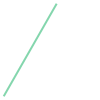

In [24]:
gdf.iloc[0].left_boundary
from shapely import wkt
wkt.loads(gdf.iloc[0].left_boundary)

In [6]:
import os
from pathlib import Path
from d123.dataset.dataset_specific.nuscenes.nuscenes_map_conversion import NuscenesMapConverter
from IPython.display import display

# 只设置到 datasets/nuscenes 根目录，不加 maps
os.environ["NUSCENES_MAPS_ROOT"] = "/cpfs01/shared/opendrivelab/datasets/nuscenes"

# 输出目录（保存生成的 GPKG，可随意）
output_path = Path("/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/maps")

print("NUSCENES_MAPS_ROOT =", os.environ.get("NUSCENES_MAPS_ROOT"))

# 创建 converter
converter = NuscenesMapConverter(output_path)

# 只加载数据，不写文件
converter._load_dataframes("singapore-hollandvillage")

# ----------- 检查 carpark ----------- #
carpark_df = converter._extract_carpark_dataframe()
print("=== 检查 carpark ===")
if carpark_df.empty:
    print("carpark_df 为空，没有可用数据")
else:
    print("carpark_df 不为空")
    print("列名：", carpark_df.columns.tolist())
    print("前 5 行数据：")
    display(carpark_df.head())

nusc_map = converter.nusc_maps["singapore-hollandvillage"]
print("carpark_area 记录数:", len(nusc_map.carpark_area))
print(nusc_map.carpark_area[:3])  # 打印前几个看看


# ----------- 检查 generic_drivable ----------- #
generic_drivable_df = converter._extract_generic_drivable_dataframe()
print("\n=== 检查 generic_drivable ===")
if generic_drivable_df.empty:
    print("generic_drivable_df 为空，没有可用数据")
else:
    print("generic_drivable_df 不为空")
    print("列名：", generic_drivable_df.columns.tolist())
    print("前 5 行数据：")
    display(generic_drivable_df.head())

print("drivable_area 记录数:", len(nusc_map.drivable_area))
print(nusc_map.drivable_area[:3])  # 打印前几个看看


NUSCENES_MAPS_ROOT = /cpfs01/shared/opendrivelab/datasets/nuscenes
=== 检查 carpark ===
carpark_df 为空，没有可用数据
carpark_area 记录数: 0
[]

=== 检查 generic_drivable ===
generic_drivable_df 不为空
列名： ['id', 'geometry']
前 5 行数据：


,id,geometry
0,road_segment_0178c63c-4d3f-4408-b232-d890d7edf218,"POLYGON ((343224.613 114013.61, 343215.922 114..."
1,road_segment_035c26a7-e844-4712-bba4-8148a49cdd90,"POLYGON ((343091.253 114101.584, 343086.8 1141..."
2,road_segment_06172a5f-152b-4936-a3e2-762377c3cf2d,"POLYGON ((343522.247 113827.668, 343528.461 11..."
3,road_segment_08d0c9fa-bbe2-4614-a0c8-b77d91fc8ce1,"POLYGON ((343711.326 113574.109, 343713.102 11..."
4,road_segment_097beabf-5516-499c-abf5-2b6b689c185d,"POLYGON ((343681.921 113524.13, 343678.743 113..."


drivable_area 记录数: 426
[{'token': '3a05a40e-6e81-4b9a-ae2c-437258c2b8b9', 'polygon_tokens': [None]}, {'token': '786875e4-21e1-455b-ae33-e8dfa35be62c', 'polygon_tokens': [None]}, {'token': 'c327c41e-64f6-49c3-b7a8-5b3406b82998', 'polygon_tokens': ['d6ad0cf7-c31a-4503-901f-cb1bd5c8c96c']}]


In [2]:
from nuscenes.map_expansion.map_api import NuScenesMap
from nuscenes.map_expansion.arcline_path_utils import discretize_lane

# 初始化地图
dataroot = "/cpfs01/shared/opendrivelab/datasets/nuscenes"  # 替换为你的maps路径
map_name = "boston-seaport"
nusc_map = NuScenesMap(dataroot=dataroot, map_name=map_name)

# 检查前5个车道的坐标维度
for i, lane_record in enumerate(nusc_map.lane[:5]):
    lane_token = lane_record['token']
    
    if lane_token in nusc_map.arcline_path_3:
        points = discretize_lane(nusc_map.arcline_path_3[lane_token], 0.1)
        dimension = len(points[0]) if points else 0
        
        print(f"车道 {i+1}: {dimension}D坐标")
        print(f"  示例点: {points[0] if points else '无数据'}")
    else:
        print(f"车道 {i+1}: 不在arcline_path_3中")

车道 1: 3D坐标
  示例点: (486.91778944573264, 812.8782745377198, 1.0859525048091125)
车道 2: 3D坐标
  示例点: (2058.4008158111765, 872.8667998448168, 0.020066716036947874)
车道 3: 3D坐标
  示例点: (1298.8869178019327, 1450.9576311622757, 1.0725905283361845)
车道 4: 3D坐标
  示例点: (2103.3308728248785, 864.2236165345912, -1.5142372902690278)
车道 5: 3D坐标
  示例点: (1333.514632335341, 1315.4579624470005, 2.6422751652107257)


In [2]:
# 修正后的地图显示问题诊断代码
from pathlib import Path
from d123.dataset.scene.arrow_scene import ArrowScene
from d123.common.visualization.viser.utils import get_map_meshes
from d123.common.geometry.base import Point2D
import shapely.geometry as geom
from IPython.display import display, HTML

# 设置 CSS 样式来禁止输出截断
display(HTML("<style>pre { white-space: pre; }</style>"))

# 1. 初始化场景
log_file = Path("/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/train/9a61a88ed9094334a73aa93c08222110.arrow")
scene = ArrowScene(log_file)

# 2. 打开场景（加载地图）
print("正在打开场景并加载地图...")
scene.open()

# 3. 检查地图API状态
print(f"\n=== 地图API状态 ===")
print(f"地图API对象: {scene.map_api}")
print(f"地图API类型: {type(scene.map_api)}")

if hasattr(scene.map_api, 'get_available_map_objects'):
    available_layers = scene.map_api.get_available_map_objects()
    print(f"可用地图图层: {available_layers}")
    
    # 检查每个图层的内容
    for layer in available_layers:
        try:
            layer_gdf = scene.map_api._gpd_dataframes[layer]
            print(f"图层 '{layer}': {len(layer_gdf)} 个对象")
            if len(layer_gdf) > 0:
                print(f"  坐标范围: {layer_gdf.total_bounds}")
        except:
            print(f"图层 '{layer}': 无法访问数据")

# 4. 获取自车位置（修正方法）
print(f"\n=== 自车位置信息 ===")
try:
    ego_state = scene.get_ego_state_at_iteration(0)
    print(f"自车状态类型: {type(ego_state)}")
    print(f"自车状态属性: {dir(ego_state)}")
    
    # 尝试不同的属性来获取位置
    if hasattr(ego_state, 'center'):
        ego_point = ego_state.center
        print(f"使用 ego_state.center: {ego_point}")
    elif hasattr(ego_state, 'position'):
        ego_point = ego_state.position
        print(f"使用 ego_state.position: {ego_point}")
    else:
        # 手动创建点用于测试
        ego_point = Point2D(x=342800.0, y=113500.0)  # 使用地图中心点附近的坐标
        print(f"使用测试点: {ego_point}")
        
except Exception as e:
    print(f"获取自车位置失败: {e}")
    # 使用地图中心点作为测试点
    map_bounds = [342215.57, 112739.44, 343436.19, 114313.53]
    center_x = (map_bounds[0] + map_bounds[2]) / 2
    center_y = (map_bounds[1] + map_bounds[3]) / 2
    ego_point = Point2D(x=center_x, y=center_y)
    print(f"使用地图中心点作为测试点: {ego_point}")

# 5. 手动测试地图查询
print(f"\n=== 地图查询测试 ===")
if hasattr(scene.map_api, 'get_proximal_map_objects'):
    try:
        # 测试不同半径的查询
        test_radii = [10.0, 50.0, 100.0, 200.0, 500.0]
        
        for radius in test_radii:
            print(f"\n查询半径: {radius} 米，中心点: ({ego_point.x:.2f}, {ego_point.y:.2f})")
            map_objects_dict = scene.map_api.get_proximal_map_objects(
                point=ego_point,
                radius=radius,
                layers=available_layers  # 查询所有可用图层
            )
            
            total_objects = 0
            for layer, objects in map_objects_dict.items():
                print(f"  图层 {layer}: {len(objects)} 个对象")
                total_objects += len(objects)
                
                # 显示前几个对象的ID和位置
                if len(objects) > 0:
                    for i, obj in enumerate(objects[:2]):  # 只显示前2个
                        if hasattr(obj, 'polygon') and obj.polygon is not None:
                            centroid = obj.polygon.centroid
                            print(f"    对象 {obj.id}: 中心点 ({centroid.x:.2f}, {centroid.y:.2f})")
                        elif hasattr(obj, 'geometry') and obj.geometry is not None:
                            centroid = obj.geometry.centroid
                            print(f"    对象 {obj.id}: 中心点 ({centroid.x:.2f}, {centroid.y:.2f})")
                        else:
                            print(f"    对象 {obj.id}: 无几何信息")
                        if i >= 1:  # 显示2个后跳出
                            break
            
            print(f"  总计: {total_objects} 个对象")
            
            if total_objects == 0:
                print(f"  ⚠️ 警告: 半径 {radius} 米内未找到任何地图对象！")
            else:
                print(f"  ✅ 成功找到 {total_objects} 个地图对象")
                
    except Exception as e:
        print(f"地图查询失败: {e}")
        import traceback
        traceback.print_exc()

# 6. 检查坐标系一致性
print(f"\n=== 坐标系检查 ===")
try:
    # 检查地图数据的坐标系
    if (hasattr(scene.map_api, '_gpd_dataframes') and 
        scene.map_api._gpd_dataframes and 
        len(scene.map_api._gpd_dataframes) > 0):
        
        first_layer = list(scene.map_api._gpd_dataframes.keys())[0]
        first_gdf = scene.map_api._gpd_dataframes[first_layer]
        
        if not first_gdf.empty:
            map_bounds = first_gdf.total_bounds
            print(f"地图数据范围: x=[{map_bounds[0]:.2f}, {map_bounds[2]:.2f}], y=[{map_bounds[1]:.2f}, {map_bounds[3]:.2f}]")
            
            # 检查测试点是否在地图范围内
            if (map_bounds[0] <= ego_point.x <= map_bounds[2] and 
                map_bounds[1] <= ego_point.y <= map_bounds[3]):
                print(f"✅ 测试点在地图范围内")
                print(f"    测试点位置: ({ego_point.x:.2f}, {ego_point.y:.2f})")
            else:
                print(f"⚠️ 警告: 测试点在地图范围外!")
                print(f"    测试点位置: ({ego_point.x:.2f}, {ego_point.y:.2f})")
                print(f"    地图范围: x=[{map_bounds[0]:.2f}, {map_bounds[2]:.2f}], y=[{map_bounds[1]:.2f}, {map_bounds[3]:.2f}]")
                
except Exception as e:
    print(f"坐标系检查失败: {e}")

# 7. 测试 get_map_meshes 函数
print(f"\n=== get_map_meshes 函数测试 ===")
try:
    meshes = get_map_meshes(scene)
    print(f"生成的网格数量: {len(meshes)}")
    
    for name, mesh in meshes.items():
        print(f"网格 '{name}': {len(mesh.vertices)} 个顶点, {len(mesh.faces)} 个面")
        
    if len(meshes) == 0:
        print("⚠️ 警告: get_map_meshes 返回空字典，没有生成任何地图网格")
        
except Exception as e:
    print(f"get_map_meshes 执行失败: {e}")
    import traceback
    traceback.print_exc()

print("\n=== 诊断完成 ===")

KeyError: 'CARLA_DATA_ROOT'

In [7]:
# 修正后的坐标转换测试
from d123.dataset.maps.map_datatypes import MapLayer
from d123.common.geometry.base import Point2D

# 计算坐标偏移量
ego_state = scene.get_ego_state_at_iteration(0)
ego_local = ego_state.center
print(f"自车局部坐标: ({ego_local.x:.2f}, {ego_local.y:.2f})")

# 地图中心点（全局坐标）
map_bounds = [342215.57, 112739.44, 343436.19, 114313.53]
map_center_x = (map_bounds[0] + map_bounds[2]) / 2
map_center_y = (map_bounds[1] + map_bounds[3]) / 2
print(f"地图中心全局坐标: ({map_center_x:.2f}, {map_center_y:.2f})")

# 计算偏移量
offset_x = map_center_x - ego_local.x
offset_y = map_center_y - ego_local.y
print(f"需要的坐标偏移: offset_x={offset_x:.2f}, offset_y={offset_y:.2f}")

# 测试转换后的查询
ego_global = Point2D(x=ego_local.x + offset_x, y=ego_local.y + offset_y)
print(f"转换后的自车全局坐标: ({ego_global.x:.2f}, {ego_global.y:.2f})")

# 测试不同半径的查询
test_radii = [10.0, 50.0, 100.0, 200.0]

for radius in test_radii:
    print(f"\n=== 查询半径: {radius} 米 ===")
    try:
        map_objects_dict = scene.map_api.get_proximal_map_objects(
            point=ego_global,
            radius=radius,
            layers=[MapLayer.LANE, MapLayer.LANE_GROUP]
        )
        
        for layer in [MapLayer.LANE, MapLayer.LANE_GROUP]:
            objects = map_objects_dict.get(layer, [])
            print(f"图层 {layer}: {len(objects)} 个对象")
            
            if len(objects) > 0:
                # 显示前几个对象的信息
                for i, obj in enumerate(objects[:2]):
                    if hasattr(obj, 'polygon') and obj.polygon is not None:
                        centroid = obj.polygon.centroid
                        distance = ((centroid.x - ego_global.x)**2 + (centroid.y - ego_global.y)**2)**0.5
                        print(f"  对象 {obj.id}: 中心点 ({centroid.x:.2f}, {centroid.y:.2f}), 距离: {distance:.2f}米")
                    else:
                        print(f"  对象 {obj.id}: 无几何信息")
                    
        if len(map_objects_dict) == 0 or all(len(obj) == 0 for obj in map_objects_dict.values()):
            print("⚠️ 未找到任何地图对象")
            
    except Exception as e:
        print(f"查询失败: {e}")

自车局部坐标: (852.79, 1652.29)
地图中心全局坐标: (342825.88, 113526.49)
需要的坐标偏移: offset_x=341973.09, offset_y=111874.19
转换后的自车全局坐标: (342825.88, 113526.49)

=== 查询半径: 10.0 米 ===
查询失败: GPKGMap.get_proximal_map_objects() got an unexpected keyword argument 'point'

=== 查询半径: 50.0 米 ===
查询失败: GPKGMap.get_proximal_map_objects() got an unexpected keyword argument 'point'

=== 查询半径: 100.0 米 ===
查询失败: GPKGMap.get_proximal_map_objects() got an unexpected keyword argument 'point'

=== 查询半径: 200.0 米 ===
查询失败: GPKGMap.get_proximal_map_objects() got an unexpected keyword argument 'point'


In [8]:
# 首先检查函数签名
import inspect
from d123.dataset.maps.gpkg.gpkg_map import GPKGMap

# 检查函数参数
sig = inspect.signature(GPKGMap.get_proximal_map_objects)
print(f"函数签名: {sig}")

# 或者查看源代码
import inspect
print(inspect.getsource(GPKGMap.get_proximal_map_objects))

函数签名: (self, point_2d: 'Point2D', radius: 'float', layers: 'List[MapLayer]') -> 'Dict[MapLayer, List[AbstractMapObject]]'
    def get_proximal_map_objects(
        self, point_2d: Point2D, radius: float, layers: List[MapLayer]
    ) -> Dict[MapLayer, List[AbstractMapObject]]:
        """Inherited, see superclass."""
        center_point = geom.Point(point_2d.x, point_2d.y)
        patch = center_point.buffer(radius)
        return self.query(geometry=patch, layers=layers, predicate="intersects")



In [17]:
import geopandas as gpd
import fiona
from pathlib import Path

def print_gpkg_bounds(gpkg_paths):
    for gpkg_path in gpkg_paths:
        gpkg_path = Path(gpkg_path)
        if not gpkg_path.is_file():
            print(f"文件不存在: {gpkg_path}")
            continue
        
        print(f"\n=== {gpkg_path.name} ===")
        layers = fiona.listlayers(gpkg_path)  # 改成直接用 fiona.listlayers
        print(f"图层: {layers}")
        
        for layer in layers:
            gdf = gpd.read_file(gpkg_path, layer=layer)
            if gdf.empty:
                print(f"  图层 '{layer}' 为空")
                continue
            bounds = gdf.total_bounds  # minx, miny, maxx, maxy
            geom_types = gdf.geom_type.unique()
            print(f"  图层 '{layer}': {len(gdf)} 个对象, 几何类型: {geom_types}, 坐标范围: {bounds}")

# Nuscenes 四张地图路径
nuscenes_maps = [
    "/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/maps/nuscenes_singapore-onenorth.gpkg",
    "/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/maps/nuscenes_singapore-hollandvillage.gpkg",
    "/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/maps/nuscenes_singapore-queenstown.gpkg",
    "/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/maps/nuscenes_boston-seaport.gpkg",
]

print_gpkg_bounds(nuscenes_maps)




=== nuscenes_singapore-onenorth.gpkg ===
图层: ['lane', 'lane_group', 'intersection', 'crosswalk', 'walkway', 'carpark', 'generic_drivable']
  图层 'lane': 936 个对象, 几何类型: ['Polygon'], 坐标范围: [342215.57464259 112739.44050034 343436.19434313 114313.53334863]
  图层 'lane_group': 781 个对象, 几何类型: ['Polygon'], 坐标范围: [342215.57464259 112739.44050034 343603.10186173 114313.53334863]
  图层 'intersection': 643 个对象, 几何类型: ['Polygon'], 坐标范围: [342215.57464259 112739.44050034 343436.19434313 114313.53334863]
  图层 'crosswalk': 120 个对象, 几何类型: ['Polygon'], 坐标范围: [342248.36205671 112747.35704544 343350.18170957 114300.75929311]
  图层 'walkway': 838 个对象, 几何类型: ['Polygon'], 坐标范围: [342254.4416904  112436.5344695  343719.86742371 114295.3255328 ]
  图层 'carpark': 39 个对象, 几何类型: ['Polygon'], 坐标范围: [342314.49612267 113044.79258283 342489.49337013 113538.34940656]


  图层 'generic_drivable': 1717 个对象, 几何类型: ['Polygon'], 坐标范围: [342215.57464259 112739.44050034 343603.10186173 114313.53334863]

=== nuscenes_singapore-hollandvillage.gpkg ===
图层: ['lane', 'lane_group', 'intersection', 'crosswalk', 'walkway', 'carpark', 'generic_drivable']
  图层 'lane': 601 个对象, 几何类型: ['Polygon'], 坐标范围: [342606.8988398  113168.53037087 344766.35424225 115258.15108383]
  图层 'lane_group': 167 个对象, 几何类型: ['Polygon'], 坐标范围: [342625.76100794 113165.92789047 344799.02143966 115268.93846287]
  图层 'intersection': 387 个对象, 几何类型: ['Polygon'], 坐标范围: [342606.8988398  113165.92789047 344799.02143966 115268.93846287]
  图层 'crosswalk': 28 个对象, 几何类型: ['Polygon'], 坐标范围: [342769.52325251 113264.74553561 343762.81769318 115219.27165226]
  图层 'walkway': 498 个对象, 几何类型: ['Polygon'], 坐标范围: [342585.50872597 113209.01835597 344722.9331098  115230.855445  ]
  图层 'carpark' 为空
  图层 'generic_drivable': 1194 个对象, 几何类型: ['Polygon'], 坐标范围: [342589.01442575 113165.92789047 344799.02143966 115268.93846287

In [1]:
import geopandas as gpd
import fiona
from pathlib import Path

# Nuscenes 和 NuPlan 的 gpkg 路径
all_maps = [
    # Nuscenes 四张地图
    "/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/maps/nuscenes_singapore-onenorth.gpkg",
    "/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/maps/nuscenes_singapore-hollandvillage.gpkg",
    "/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/maps/nuscenes_singapore-queenstown.gpkg",
    "/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/maps/nuscenes_boston-seaport.gpkg",
    # NuPlan gpkg
    "/cpfs01/shared/opendrivelab/sii/jingchanghui/d123_workspace/data/maps/nuplan_sg-one-north.gpkg",
]

with open("nuscenes_layers_bounds.txt", "w") as f:
    for gpkg_path in all_maps:
        gpkg_path = Path(gpkg_path)
        if not gpkg_path.is_file():
            f.write(f"文件不存在: {gpkg_path}\n")
            continue

        layers = fiona.listlayers(gpkg_path)
        f.write(f"\n=== {gpkg_path.name} ===\n")
        f.write(f"图层: {layers}\n")
        for layer in layers:
            gdf = gpd.read_file(gpkg_path, layer=layer)
            if gdf.empty:
                f.write(f"  图层 '{layer}' 为空\n")
                continue
            bounds = gdf.total_bounds  # minx, miny, maxx, maxy
            geom_types = gdf.geom_type.unique()
            f.write(f"  图层 '{layer}': {len(gdf)} 个对象, 几何类型: {geom_types}, 坐标范围: {bounds}\n")


In [22]:
# 测试 NuScenes / NuPlan 地图网格获取的调试脚本
import numpy as np

MAP_RADIUS_TEST = 2000  # 测试用较大半径

# 假设 scene 已经定义并加载
initial_ego = scene.get_ego_state_at_iteration(0)
center = initial_ego.center_se3

map_layers = [
    MapLayer.LANE_GROUP,
    MapLayer.LANE,
    MapLayer.WALKWAY,
    MapLayer.CROSSWALK,
    MapLayer.CARPARK,
    MapLayer.GENERIC_DRIVABLE,
]

map_objects_dict = scene.map_api.get_proximal_map_objects(
    point_2d=center.point_2d,
    radius=MAP_RADIUS_TEST,
    layers=map_layers
)

print(f"中心点: ({center.point_2d.x:.2f}, {center.point_2d.y:.2f})")
for map_layer, objects in map_objects_dict.items():
    print(f"{map_layer.serialize()}: 找到 {len(objects)} 个对象")
    if len(objects) > 0 and hasattr(objects[0], 'polygon'):
        centroid = objects[0].polygon.centroid
        dist = ((centroid.x - center.point_2d.x)**2 + (centroid.y - center.point_2d.y)**2)**0.5
        print(f"   最近对象距离: {dist:.2f} 米")
        # 打印前几个顶点范围
        if hasattr(objects[0], 'trimesh_mesh'):
            vertices = objects[0].trimesh_mesh.vertices
            print(f"   顶点 X范围: {vertices[:,0].min():.1f} ~ {vertices[:,0].max():.1f}")
            print(f"   顶点 Y范围: {vertices[:,1].min():.1f} ~ {vertices[:,1].max():.1f}")
            print(f"   顶点 Z范围: {vertices[:,2].min():.1f} ~ {vertices[:,2].max():.1f}")


AttributeError: 'Scene' object has no attribute 'get_ego_state_at_iteration'

In [23]:
# 检查 scene 对象属性
print(type(scene))
print(dir(scene))

# 如果 scene 有 logs / records / states 属性，打印前几个看看
for attr in ['ego_states', 'log', 'records', 'states']:
    if hasattr(scene, attr):
        print(f"scene.{attr} exists, first few entries:")
        val = getattr(scene, attr)
        print(val[:3] if hasattr(val, '__getitem__') else val)


<class 'trimesh.scene.scene.Scene'>
['__abstractmethods__', '__add__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_cache', '_camera', 'add_geometry', 'apply_obb', 'apply_scale', 'apply_transform', 'apply_translation', 'area', 'bounding_box', 'bounding_box_oriented', 'bounding_cylinder', 'bounding_primitive', 'bounding_sphere', 'bounds', 'bounds_corners', 'camera', 'camera_rays', 'camera_transform', 'center_mass', 'centroid', 'convert_units', 'convex_hull', 'copy', 'delete_geometry', 'dump', 'duplicate_nodes', 'explode', 'export', 'extents', 'geometry', 'geometry_identifiers', 'graph', 'has_camera', 'identifier_hash', 